In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Part 1

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins['year'] = logins['login_time'].dt.year
logins['month'] = logins['login_time'].dt.month
logins['day'] = logins['login_time'].dt.day

In [5]:
by_day = logins.groupby(['year','month','day']).count()

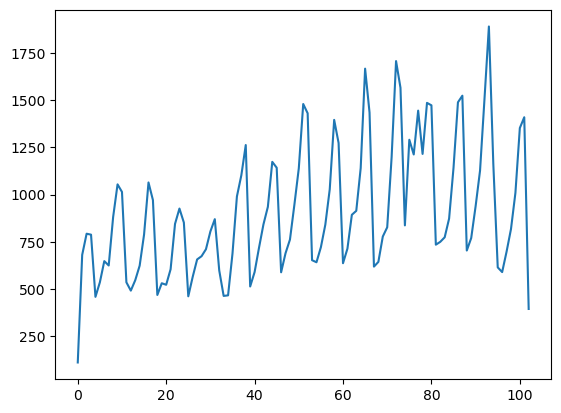

In [6]:
plt.plot(by_day['login_time'].to_numpy())

In [7]:
by_day.index = [pd.to_datetime(f'{y}/{m}/{d}') for y,m,d in by_day.index]

In [8]:
train = by_day[:-5]
test = by_day[-5:]

In [9]:
from autots import AutoTS
model = AutoTS(
    forecast_length=5,
    frequency='D',
    prediction_interval=0.95,
    ensemble=None,
    models_mode='deep',
    model_list = 'univariate',# or ['ARIMA','ETS']
    max_generations=10,
    num_validations=5,
    no_negatives=True,
    n_jobs='auto')

Using 6 cpus for n_jobs.


In [10]:
model.fit(train)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99345D+00    |proj g|=  6.12815D-01

At iterate    1    f=  6.87774D+00    |proj g|=  2.25014D-01

At iterate    2    f=  6.80819D+00    |proj g|=  9.88501D-02

At iterate    3    f=  6.79530D+00    |proj g|=  5.57148D-02

At iterate    4    f=  6.78963D+00    |proj g|=  3.11282D-02

At iterate    5    f=  6.78628D+00    |proj g|=  2.20369D-02

At iterate    6    f=  6.78311D+00    |proj g|=  2.56619D-02

At iterate    7    f=  6.78111D+00    |proj g|=  2.10324D-02

At iterate    8    f=  6.77922D+00    |proj g|=  2.39130D-02

At iterate    9    f=  6.77610D+00    |proj g|=  2.66807D-02

At iterate   10    f=  6.77318D+00    |proj g|=  5.90302D-02

At iterate   11    f=  6.76959D+00    |proj g|=  2.4

 This problem is unconstrained.



At iterate   13    f=  6.76172D+00    |proj g|=  3.40726D-02

At iterate   14    f=  6.75871D+00    |proj g|=  2.38553D-02

At iterate   15    f=  6.75712D+00    |proj g|=  2.37297D-02

At iterate   16    f=  6.75570D+00    |proj g|=  2.04745D-02

At iterate   17    f=  6.75381D+00    |proj g|=  1.50141D-02

At iterate   18    f=  6.75302D+00    |proj g|=  1.00193D-01

At iterate   19    f=  6.75198D+00    |proj g|=  1.98463D-02

At iterate   20    f=  6.75156D+00    |proj g|=  2.31768D-02

At iterate   21    f=  6.75001D+00    |proj g|=  1.13364D-02

At iterate   22    f=  6.74910D+00    |proj g|=  1.11519D-02

At iterate   23    f=  6.74792D+00    |proj g|=  1.23782D-02

At iterate   24    f=  6.74748D+00    |proj g|=  1.05097D-01

At iterate   25    f=  6.74691D+00    |proj g|=  5.04195D-02

At iterate   26    f=  6.74683D+00    |proj g|=  8.64439D-03

At iterate   27    f=  6.74681D+00    |proj g|=  4.87615D-03

At iterate   28    f=  6.74679D+00    |proj g|=  3.58241D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 8 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 8 in generation 0: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model ETS in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLM in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GLS in generation 0 of 10
Model Number: 15 with model LastValueNaive in generation 0 of 10
Model Number: 16 with model LastValueNaive in generation 0 of 10
Model Number: 17 with model LastValueNaive in generation 0 of 10
Model Number: 18 with model LastValueNaive in generation 0 of 10
Model Number: 19 with model SeasonalNaive in generation 0 of 10
Model Number: 20 with model SeasonalNaive in generation 0 of 10
Model Number: 21 with model SeasonalNaive in generation 0 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 22 with model UnobservedComponents in generation 0 of 10
Model Number: 23 with model UnobservedComponents in generation 0 of 10
Model Number: 24 with model UnobservedComponents in generation 0 of 10
Model Number: 25 with model ConstantNaive in generation 0 of 10
Model Number: 26 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 26 in generation 0: FBProphet
Model Number: 27 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 10
Model Number: 29 with model DatepartRegression in generation 0 of 10
Model Number: 30 with model UnobservedComponents in generation 0 of 10
Model Number: 31 with model UnobservedComponents in generation 0 of 10
Model Number: 32 with model ETS in generation 0 of 10
Model Number: 33 

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/impute.py:54: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


Model Number: 53 with model UnobservedComponents in generation 0 of 10
Model Number: 54 with model DatepartRegression in generation 0 of 10
Model Number: 55 with model MetricMotif in generation 0 of 10
Model Number: 56 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 56 in generation 0: ARCH
Model Number: 57 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28014D+00    |proj g|=  3.55271D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

  

 This problem is unconstrained.


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_2', 'polynomial_degree': 2, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}, 'holiday_countries_used': True}, '2': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 72 in generation 0: SeasonalNaive
Model Number: 73 with model MetricMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=99) out of bounds (79)') in model 73 in generation 0: MetricMotif
Model Number: 74 with model MetricMotif in generation 0 of 10

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.213e+05, tolerance: 7.535e+02
  model = cd_fast.enet_coordinate_descent(


Model Number: 77 with model NeuralProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 77 in generation 0: NeuralProphet
Model Number: 78 with model Theta in generation 0 of 10
Model Number: 79 with model ETS in generation 0 of 10
Model Number: 80 with model PreprocessingRegression in generation 0 of 10
Model Number: 81 with model UnobservedComponents in generation 0 of 10
Model Number: 82 with model KalmanStateSpace in generation 0 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.386e+05, tolerance: 9.066e+02
  model = cd_fast.enet_coordinate_descent(


Model Number: 83 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97411D-01    |proj g|=  1.89649D-01

At iterate    1    f=  3.81135D-01    |proj g|=  7.76133D-01

At iterate    2    f=  3.62125D-01    |proj g|=  1.50106D-01

At iterate    3    f=  3.53747D-01    |proj g|=  1.39055D-01

At iterate    4    f=  3.24135D-01    |proj g|=  3.14093D-01

At iterate    5    f=  3.00539D-01    |proj g|=  3.01757D-01

At iterate    6    f=  2.91399D-01    |proj g|=  1.57041D-01

At iterate    7    f=  2.83962D-01    |proj g|=  7.03209D-02

At iterate    8    f=  2.79648D-01    |proj g|=  9.44965D-02

At iterate    9    f=  2.76405D-01    |proj g|=  1.39288D-01

At iterate   10    f=  2.72970D-01    |proj g|=  4.71284D-02

At iterate   11    f=  2.72373D-01    |proj g|=  2.18532D-02

At iterate   12    f=  2.72124D-

 This problem is unconstrained.



At iterate   19    f=  2.67544D-01    |proj g|=  6.49576D-02

At iterate   20    f=  2.67259D-01    |proj g|=  2.45813D-02

At iterate   21    f=  2.66844D-01    |proj g|=  2.54774D-02

At iterate   22    f=  2.66689D-01    |proj g|=  2.85650D-02

At iterate   23    f=  2.66465D-01    |proj g|=  3.51904D-02

At iterate   24    f=  2.66344D-01    |proj g|=  2.73138D-02

At iterate   25    f=  2.66160D-01    |proj g|=  2.33341D-02

At iterate   26    f=  2.66110D-01    |proj g|=  3.20455D-02

At iterate   27    f=  2.66050D-01    |proj g|=  3.18632D-02

At iterate   28    f=  2.66001D-01    |proj g|=  9.45822D-03

At iterate   29    f=  2.65987D-01    |proj g|=  7.93101D-03

At iterate   30    f=  2.65958D-01    |proj g|=  4.45204D-03

At iterate   31    f=  2.65915D-01    |proj g|=  5.89072D-03

At iterate   32    f=  2.65860D-01    |proj g|=  2.26390D-02

At iterate   33    f=  2.65735D-01    |proj g|=  1.08657D-02

At iterate   34    f=  2.65578D-01    |proj g|=  7.02127D-03

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.


Model Number: 113 with model LastValueNaive in generation 0 of 10
Model Number: 114 with model UnivariateMotif in generation 0 of 10
Model Number: 115 with model Theta in generation 0 of 10
Model Number: 116 with model ConstantNaive in generation 0 of 10
Model Number: 117 with model GLS in generation 0 of 10
Model Number: 118 with model NeuralProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 118 in generation 0: NeuralProphet
Model Number: 119 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50806D+00    |proj g|=  6.97746D-01

At iterate    1    f=  6.46918D+00    |proj g|=  2.36003D-01

At iterate    2    f=  6.46007D+00    |proj g|=  1.45085D-01

At iterate    3    f=  6.45264D+00    |proj g|=  1.31991D-01

At iterate    4    f=  6.43993D+

 This problem is unconstrained.



At iterate   40    f=  6.39390D+00    |proj g|=  6.99471D-03

At iterate   41    f=  6.39385D+00    |proj g|=  8.62055D-03

At iterate   42    f=  6.39371D+00    |proj g|=  1.47392D-02

At iterate   43    f=  6.39359D+00    |proj g|=  1.80808D-02

At iterate   44    f=  6.39340D+00    |proj g|=  2.12784D-02

At iterate   45    f=  6.39301D+00    |proj g|=  1.42904D-02

At iterate   46    f=  6.39284D+00    |proj g|=  7.26272D-03

At iterate   47    f=  6.39275D+00    |proj g|=  2.01189D-02

At iterate   48    f=  6.39264D+00    |proj g|=  9.30326D-03

At iterate   49    f=  6.39256D+00    |proj g|=  1.10730D-02

At iterate   50    f=  6.39249D+00    |proj g|=  1.20088D-02

At iterate   51    f=  6.39244D+00    |proj g|=  7.56366D-03

At iterate   52    f=  6.39241D+00    |proj g|=  7.14634D-03

At iterate   53    f=  6.39229D+00    |proj g|=  1.01090D-02

At iterate   54    f=  6.39222D+00    |proj g|=  1.52444D-02

At iterate   55    f=  6.39215D+00    |proj g|=  7.89893D-03

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 126 in generation 0: NeuralProphet
Model Number: 127 with model Theta in generation 0 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 127 in generation 0: Theta
Model Number: 128 with model GLS in generation 0 of 10
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params zero {'0': {}, '1': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': 'simple_2', 'po

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linea

Model Number: 155 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 155 in generation 0: DatepartRegression
Model Number: 156 with model MLEnsemble in generation 0 of 10
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 156 in generation 0: MLEnsemble
Model Number: 157 with model PreprocessingRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 157 in generation 0: PreprocessingRegression
New Generation: 1 of 10
Model Number: 158 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params nearest {'0': {}, '1': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofm

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1798: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


Model Number: 161 with model KalmanStateSpace in generation 1 of 10
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'fillna': 'SeasonalityMotifImputerLinMix', 'center': 'median'}}") in model 161 in generation 1: KalmanStateSpace
Model Number: 162 with model ConstantNaive in generation 1 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '1': {}, '2': {'whiten': False}, '3': {}, '4': {}}") in model 162 in generation 1: ConstantNaive
Model Number: 163 with model Theta i

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/seasonal.py:630: RuntimeWarning: invalid value encountered in divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)
 This problem is unconstrained.


Model Number: 165 with model Theta in generation 1 of 10
Model Number: 166 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '2': {'whiten': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {}}") in model 166 in generation 1: LastValueNaive
Model Number: 167 with model DatepartRegression in generation 1 of 10
Model Number: 168 with model GLS in generation 1 of 10
Model Number: 169 with model ARDL in generation 1 of 10
Model Number: 170 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 170 in generation 1: ARIMA
Model Number: 171 with model LastValueNaive in generation 1 of 10
Model Numbe

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 177 with model UnivariateMotif in generation 1 of 10
Model Number: 178 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError('Input X contains NaN.\nMultiTaskElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 178 in generation 1: UnivariateRegression
Model Number: 179 with model UnobservedComponents in generation 1 of 10
Model Number: 180 with model DatepartRegression in generatio

 This problem is unconstrained.



At iterate   13    f= -8.44978D-01    |proj g|=  3.61562D-01

At iterate   14    f= -8.64380D-01    |proj g|=  2.07914D-01

At iterate   15    f= -8.78442D-01    |proj g|=  6.17653D-01

At iterate   16    f= -8.84362D-01    |proj g|=  1.89138D-01

At iterate   17    f= -8.89954D-01    |proj g|=  5.38543D-01

At iterate   18    f= -8.95793D-01    |proj g|=  3.73418D-01

At iterate   19    f= -9.00256D-01    |proj g|=  7.35995D-02

At iterate   20    f= -9.00597D-01    |proj g|=  1.24739D-01

At iterate   21    f= -9.00985D-01    |proj g|=  1.71009D-01

At iterate   22    f= -9.01487D-01    |proj g|=  2.02816D-01

At iterate   23    f= -9.01924D-01    |proj g|=  5.68321D-02

At iterate   24    f= -9.02238D-01    |proj g|=  2.36701D-02

At iterate   25    f= -9.02516D-01    |proj g|=  2.60836D-02

At iterate   26    f= -9.02932D-01    |proj g|=  3.28993D-01

At iterate   27    f= -9.03355D-01    |proj g|=  5.44127D-02

At iterate   28    f= -9.03399D-01    |proj g|=  1.24763D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 200 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 7}, '1': {'span': 7}, '2': {'output_distribution': 'normal', 'n_quantiles': 31}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 200 in generation 1: LastValueNaive
Model Number: 201 with model GLS in generation 1 of 10
Model Number: 202 with model UnivariateRegression in generation 1 of 10
Model Number: 203 with model SeasonalNaive in generation 1 of 10
Model Number: 204 with model ETS in generation 1 of 10
Model Number: 205 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20157D+00    |proj g|=  7.01799D-01

At iterate    1    f= 

 This problem is unconstrained.



At iterate   29    f=  7.78986D-01    |proj g|=  6.69227D-02

At iterate   30    f=  7.78103D-01    |proj g|=  1.04133D-01

At iterate   31    f=  7.77455D-01    |proj g|=  1.67217D-01

At iterate   32    f=  7.76951D-01    |proj g|=  5.37805D-02

At iterate   33    f=  7.76610D-01    |proj g|=  4.51225D-02

At iterate   34    f=  7.76245D-01    |proj g|=  1.97103D-01

At iterate   35    f=  7.75684D-01    |proj g|=  7.20234D-02

At iterate   36    f=  7.75581D-01    |proj g|=  5.43894D-02

At iterate   37    f=  7.75341D-01    |proj g|=  6.64235D-02

At iterate   38    f=  7.75151D-01    |proj g|=  5.99609D-02

At iterate   39    f=  7.74762D-01    |proj g|=  6.77533D-02

At iterate   40    f=  7.73708D-01    |proj g|=  9.01725D-02

At iterate   41    f=  7.72490D-01    |proj g|=  8.56046D-02

At iterate   42    f=  7.71073D-01    |proj g|=  4.25293D-01

At iterate   43    f=  7.68117D-01    |proj g|=  6.31211D-01

At iterate   44    f=  7.63907D-01    |proj g|=  8.70271D-01

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTrans

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 214 in generation 1: GLM
Model Number: 215 with model ETS in generation 1 of 10
Model Number: 216 with model KalmanStateSpace in generation 1 of 10
Model Number: 217 with model Theta in generation 1 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWa

Model Number: 218 with model UnobservedComponents in generation 1 of 10
Template Eval Error: Exception("Transformer AlignLastDiff failed on inverse from params ffill {'0': {'rows': 1}, '1': {'rows': 364, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '2': {'whiten': False}, '3': {'fillna': 'linear', 'center': 'median'}, '4': {}}") in model 218 in generation 1: UnobservedComponents
Model Number: 219 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 219 in generation 1: DatepartRegression
Model Number: 220 with model UnivariateMotif in generation 1 of 10
Model Number: 221 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42818D+00    |proj g|=  1.61600D+00

At it

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
 This problem is unconstrained.



At iterate   18    f=  1.03854D+00    |proj g|=  2.62653D-03

At iterate   19    f=  1.03850D+00    |proj g|=  5.02580D-03

At iterate   20    f=  1.03847D+00    |proj g|=  6.00422D-03

At iterate   21    f=  1.03843D+00    |proj g|=  1.24863D-02

At iterate   22    f=  1.03837D+00    |proj g|=  4.63987D-03

At iterate   23    f=  1.03833D+00    |proj g|=  4.06833D-03

At iterate   24    f=  1.03825D+00    |proj g|=  8.14481D-03

At iterate   25    f=  1.03812D+00    |proj g|=  9.95156D-03

At iterate   26    f=  1.03789D+00    |proj g|=  3.46034D-02

At iterate   27    f=  1.03758D+00    |proj g|=  1.23201D-02

At iterate   28    f=  1.03719D+00    |proj g|=  1.47302D-02

At iterate   29    f=  1.03694D+00    |proj g|=  4.10338D-02

At iterate   30    f=  1.03683D+00    |proj g|=  4.49651D-02

At iterate   31    f=  1.03650D+00    |proj g|=  1.61785D-02

At iterate   32    f=  1.03635D+00    |proj g|=  1.33900D-02

At iterate   33    f=  1.03609D+00    |proj g|=  2.07895D-02

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12119e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X 

Model Number: 233 with model AverageValueNaive in generation 1 of 10
Model Number: 234 with model SeasonalityMotif in generation 1 of 10
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'low': 6, 'high': 90, 'K': 1, 'lanczos_factor': False, 'return_diff': True}, '1': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': True, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 90, 'center': False}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': True}, 'remove_excess_anomalies': True, 'impact': 'median_value', 'regression_params': {}}, '2': {'rows': 1, 'lag': 1

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

Model Number: 241 with model GLM in generation 1 of 10
Model Number: 242 with model PreprocessingRegression in generation 1 of 10
Template Eval Error: InvalidParameterError("The 'whiten' parameter of FastICA must be a str among {'unit-variance', 'arbitrary-variance'} or a bool among {False}. Got True instead.") in model 242 in generation 1: PreprocessingRegression
Model Number: 243 with model ARIMA in generation 1 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params akima {'0': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.041666666666666664}}, '1': {'lag_1': 28, 'method': 'Median'}, '2': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 243 in generation 1: ARIMA
Model Number: 244 with model GLS in generation 1 of 10
Model Number: 245 with model UnivariateMotif in generation 1 

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Template Eval Error: ValueError('Model failed to return correct number of series.') in model 252 in generation 1: UnobservedComponents
Model Number: 253 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36522D+02    |proj g|=  9.72764D+04

At iterate    1    f=  1.03898D+00    |proj g|=  7.80777D-01

At iterate    2    f=  4.60896D-01    |proj g|=  1.20115D+00

At iterate    3    f= -1.03654D-01    |proj g|=  1.09388D+00

At iterate    4    f= -1.05776D-01    |proj g|=  1.89114D+00

At iterate    5    f= -6.42734D-01    |proj g|=  1.14948D+00

At iterate    6    f= -6.98284D-01    |proj g|=  4.15864D+00

At iterate    7    f= -9.20779D-01    |proj g|=  5.93010D+00

At iterate    8    f= -1.42304D+00    |proj g|=  1.35501D+00

At iterate    9    f= -1.50058D+00    |proj g|=  9.39711D+00

At iterate   10    f

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 262 in generation 1: GLM
Model Number: 263 with model ETS in generation 1 of 10
Model Number: 264 with model MetricMotif in generation 1 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'span': 7}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '3': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 4, 'min_samples_leaf': 1, 'bootstrap': False}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}, 'holiday_countries_used': True}}") in model 264 in generation 1: MetricMotif
Model Number: 265 with 

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWa

Model Number: 266 with model SeasonalNaive in generation 1 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'whiten': False}, '3': {}}") in model 266 in generation 1: SeasonalNaive
Model Number: 267 with model DatepartRegression in generation 1 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'method': 'remove', 'std_threshold': 4.5, 'fillna': 'rolling_mean_24'}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': None}, '2': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 100, 'whiten': True}, '3': {'method': 'IQR', 'method_params': {'iqr_threshold': 

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}, '3': {'model': 'Linear', 'phi': 0.99, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 278 in generation 2: UnobservedComponents
Model Number: 279 with model UnivariateRegression in generation 2 of 10
Model Number: 280 with model UnivariateMotif in generation 2 of 10
Model Number: 281 with model Theta in generation 2 of 10
Model Number: 282 with model SeasonalNaive in generation 2 of 10
Model Number: 283 with model UnivariateRegression in generation 2 of 10
Template E

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83369D+01    |proj g|=  2.67785D+01

At iterate    1    f=  5.38446D+00    |proj g|=  3.56484D+00

At iterate    2    f=  4.93187D+00    |proj g|=  2.71227D+00

At iterate    3    f=  4.23016D+00    |proj g|=  1.15545D+00

At iterate    4    f=  4.02071D+00    |proj g|=  5.21651D-01

At iterate    5    f=  3.92337D+00    |proj g|=  2.73785D-01

At iterate    6    f=  3.86098D+00    |proj g|=  1.44133D-01

At iterate    7    f=  3.81903D+00    |proj g|=  1.15564D-01

At iterate    8    f=  3.79781D+00    |proj g|=  1.56568D-01

At iterate    9    f=  3.77799D+00    |proj g|=  2.04601D-01

At iterate   10    f=  3.74055D+00    |proj g|=  1.65825D-01

At iterate   11    f=  3.73461D+00    |proj g|=  4.68167D-01

At iterate   12    f=  3.71235D+00    |proj g|=  5.31236D-02

At iterate   13    f=  3.7

 This problem is unconstrained.


Model Number: 287 with model FFT in generation 2 of 10
Model Number: 288 with model AverageValueNaive in generation 2 of 10
Model Number: 289 with model GLM in generation 2 of 10
Model Number: 290 with model LastValueNaive in generation 2 of 10
Model Number: 291 with model GLS in generation 2 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params fake_date {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 5, 'subsample': 0.5, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'multi_strategy': 'multi_output_tree', 'tree_method': 'hist'}, 'datepart_method': 'expanded_binarized'}, 'fillna': None}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.7, 'first_value_only': False}}") in model 291 in generation 2: GLS
Model Number: 292 wit

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neigh

Model Number: 305 with model GLM in generation 2 of 10
Model Number: 306 with model SeasonalNaive in generation 2 of 10
Model Number: 307 with model SeasonalityMotif in generation 2 of 10
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 307 in generation 2: SeasonalityMotif
Model Number: 308 with model UnivariateMotif in generation 2 of 10
Model Number: 309 with model UnobservedComponents in generation 2 of 10
Model Number: 310 with model AverageValueNaive in generation 2 of 10
Model Number: 311 with model KalmanStateSpace in generation 2 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 312 with model SeasonalNaive in generation 2 of 10
Model Number: 313 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 313 in generation 2: DatepartRegression
Model Number: 314 with model AverageValueNaive in generation 2 of 10
Model Number: 315 with model DatepartRegression in generation 2 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 316 with model DatepartRegression in generation 2 of 10
Model Number: 317 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 317 in generation 2: UnivariateRegression
Model Number: 318 with model SeasonalNaive in generation 2 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature nam

Model Number: 319 with model ARDL in generation 2 of 10
Model Number: 320 with model PreprocessingRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 320 in generation 2: PreprocessingRegression
Model Number: 321 with model ETS in generation 2 of 10
Model Number: 322 with model UnivariateMotif in generation 2 of 10
Model Number: 323 with model AverageValueNaive in generation 2 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'whiten': False}, '3': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '4': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 323 in generation 2: AverageValueNaive
Model Number: 

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/seasonal.py:630: RuntimeWarning: invalid value

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51009D-01    |proj g|=  1.82012D-01

At iterate    1    f=  8.32482D-01    |proj g|=  2.35376D-01

At iterate    2    f=  8.18654D-01    |proj g|=  1.18440D-01

At iterate    3    f=  8.11132D-01    |proj g|=  9.28008D-02

At iterate    4    f=  8.00803D-01    |proj g|=  9.60628D-02

At iterate    5    f=  7.90413D-01    |proj g|=  9.81828D-02

At iterate    6    f=  7.84944D-01    |proj g|=  1.64784D-01

At iterate    7    f=  7.81428D-01    |proj g|=  5.56241D-02

At iterate    8    f=  7.79886D-01    |proj g|=  5.53200D-02

At iterate    9    f=  7.76172D-01    |proj g|=  9.84710D-02

At iterate   10    f=  7.67112D-01    |proj g|=  1.64547D-01

At iterate   11    f=  7.59414D-01    |proj g|=  1.57068D-01

At iterate   12    f=  7.56689D-01    |proj g|=  3.82271D-02

At iterate   13    f=  7.5

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 348 with model SeasonalityMotif in generation 2 of 10
Model Number: 349 with model GLM in generation 2 of 10
Model Number: 350 with model SeasonalityMotif in generation 2 of 10
Model Number: 351 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35109D+00    |proj g|=  5.96631D+00

At iterate    1    f=  5.20744D+00    |proj g|=  2.67750D-01

At iterate    2    f=  5.18208D+00    |proj g|=  2.02280D-01

At iterate    3    f=  5.15001D+00    |proj g|=  1.15937D-01

At iterate    4    f=  5.13893D+00    |proj g|=  1.13557D-01

At iterate    5    f=  5.09987D+00    |proj g|=  1.03896D-01

At iterate    6    f=  5.08088D+00    |proj g|=  1.66520D-01

At iterate    7    f=  4.97863D+00    |proj g|=  2.10492D-01

At iterate    8    f=  4.80735D+00    |proj g|=  2.69102D-01

At iterate    9    f=  4.7

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.


Model Number: 353 with model UnobservedComponents in generation 2 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {'method': 0.3}, '2': {'whiten': False}, '3': {}, '4': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '5': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 4, 'deriv': 0, 'mode': 'interp'}}}") in model 353 in generation 2: UnobservedComponents
Model Number: 354 with model Theta in generation 2 of 10
Model Number: 355 with model KalmanStateSpace in generation 2 of 10
Model Number: 356 with model UnivariateMotif in generation 2 of 10
Model Number: 357 with model UnivariateMotif in generation 2 of 10
Model Number: 358 with model GLM in generation 2 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.



At iterate   23    f=  6.70118D-01    |proj g|=  8.33576D-05

At iterate   24    f=  6.70118D-01    |proj g|=  4.01265D-05

At iterate   25    f=  6.70118D-01    |proj g|=  5.63432D-05

At iterate   26    f=  6.70118D-01    |proj g|=  6.27685D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     26     30      1     0     0   6.277D-05   6.701D-01
  F =  0.67011823119572878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 363 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At 

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 369 with model LastValueNaive in generation 2 of 10
Model Number: 370 with model SeasonalNaive in generation 2 of 10
Model Number: 371 with model ARIMA in generation 2 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {}, '2': {'part': 'trend', 'lamb': 104976000000}, '3': {}, '4': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 100, 'whiten': True}}") in model 371 in generation 2: ARIMA
Model Number: 372 with model DatepartRegression in generation 2 of 10
Model Number: 373 with model ETS in generation 2 of 10
Model Number: 374 with model GLM in generation 2 of 10
Model Number: 375 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13448D+00    |proj g|=  2.84095D-02

At iterate    1  

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 384 with model ARDL in generation 2 of 10
Model Number: 385 with model ARDL in generation 2 of 10
Model Number: 386 with model MetricMotif in generation 2 of 10
Model Number: 387 with model UnivariateMotif in generation 2 of 10
New Generation: 3 of 10
Model Number: 388 with model UnobservedComponents in generation 3 of 10
Model Number: 389 with model SeasonalNaive in generation 3 of 10
Model Number: 390 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params fake_date {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {}, '2': {'whiten': False}, '3': {}}") in model 390 in generation 3: LastValueNaive
Model Number: 391 with model SeasonalityMotif in generation 3 of 10
Model Number: 392 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 3

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1798: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Model Number: 400 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69042D+00    |proj g|=  5.54120D+00

At iterate    1    f=  1.23559D+00    |proj g|=  6.50264D-01

At iterate    2    f=  7.65201D-01    |proj g|=  2.42650D-01

At iterate    3    f=  7.58551D-01    |proj g|=  8.33818D-02

At iterate    4    f=  7.54032D-01    |proj g|=  2.97460D-02

At iterate    5    f=  7.53218D-01    |proj g|=  2.43389D-02

At iterate    6    f=  7.52480D-01    |proj g|=  2.06771D-02

At iterate    7    f=  7.51579D-01    |proj g|=  1.86709D-02

At iterate    8    f=  7.50713D-01    |proj g|=  1.64760D-02

At iterate    9    f=  7.50565D-01    |proj g|=  9.99994D-03

At iterate   10    f=  7.50480D-01    |proj g|=  5.10038D-03

At iterate   11    f=  7.50452D-01    |proj g|=  5.12795D-03

At iterate   12    f=  7.50386D

 This problem is unconstrained.



At iterate   43    f=  6.72838D-01    |proj g|=  1.36207D-03

At iterate   44    f=  6.72836D-01    |proj g|=  2.95021D-03

At iterate   45    f=  6.72830D-01    |proj g|=  8.34192D-03

At iterate   46    f=  6.72825D-01    |proj g|=  1.36357D-02

At iterate   47    f=  6.72811D-01    |proj g|=  1.74073D-02

At iterate   48    f=  6.72778D-01    |proj g|=  2.47564D-02

At iterate   49    f=  6.72683D-01    |proj g|=  3.06100D-02

At iterate   50    f=  6.72593D-01    |proj g|=  7.02098D-02

At iterate   51    f=  6.72328D-01    |proj g|=  1.83374D-02

At iterate   52    f=  6.72272D-01    |proj g|=  2.28171D-02

At iterate   53    f=  6.72114D-01    |proj g|=  1.99505D-02

At iterate   54    f=  6.71703D-01    |proj g|=  1.26652D-02

At iterate   55    f=  6.71573D-01    |proj g|=  1.66405D-02

At iterate   56    f=  6.71545D-01    |proj g|=  4.93785D-03

At iterate   57    f=  6.71531D-01    |proj g|=  4.75768D-03

At iterate   58    f=  6.71474D-01    |proj g|=  1.68805D-02

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 406 with model DatepartRegression in generation 3 of 10
Model Number: 407 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {}, '1': {}, '2': {'whiten': False}}") in model 407 in generation 3: SeasonalNaive
Model Number: 408 with model UnobservedComponents in generation 3 of 10
Model Number: 409 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 409 in generation 3: UnobservedComponents
Model Number: 410 with model MetricMotif in generation 3 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {}, '2': {'whiten': False}, '3': {'method': 'butter', 'method_args': {'N': 5, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.03571428571428571}}, '4': {}}")

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/

Model Number: 434 with model KalmanStateSpace in generation 3 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params linear {'0': {'window_size': 90, 'alpha': 3.5, 'grouping_forward_limit': 3, 'max_level_shifts': 5, 'alignment': 'last_value'}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'pchip'}, '2': {}, '3': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 1.5, 'leaf_size': 30}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'ffill'}, '4': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.058823529411764705}}}") in model 434 in generation 3: KalmanStateSpace
Model Number: 435 with model KalmanStateSpace in generation 3 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 436 with model SeasonalNaive in generation 3 of 10
Model Number: 437 with model Theta in generation 3 of 10
Model Number: 438 with model UnivariateMotif in generation 3 of 10
Template Eval Error: Exception("Transformer QuantileTransformer failed on inverse from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'whiten': False}, '3': {'sigma': 2.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}, '4': {}}") in model 438 in generation 3: UnivariateMotif
Model Number: 439 with model LastValueNaive in generation 3 of 10
Model Number: 440 with model UnobservedComponents in gener

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/g


At iterate    2    f=  7.87084D+00    |proj g|=  1.37748D+01

At iterate    3    f=  3.00068D+00    |proj g|=  4.08598D+00

At iterate    4    f=  2.13091D+00    |proj g|=  2.26750D+00

At iterate    5    f=  1.60899D+00    |proj g|=  1.13487D+00

At iterate    6    f=  1.38235D+00    |proj g|=  6.16361D-01

At iterate    7    f=  1.26704D+00    |proj g|=  5.76913D-01

At iterate    8    f=  1.20489D+00    |proj g|=  6.89271D-01

At iterate    9    f=  1.15153D+00    |proj g|=  7.69318D-01

At iterate   10    f=  1.05422D+00    |proj g|=  8.81412D-01

At iterate   11    f= -5.39400D-01    |proj g|=  3.18399D+00
  ys=-1.423E+00  -gs= 9.368E-01 BFGS update SKIPPED

At iterate   12    f= -2.37555D+00    |proj g|=  1.93529D+01
  ys=-2.106E+00  -gs= 9.276E-01 BFGS update SKIPPED

At iterate   13    f= -2.68719D+00    |proj g|=  1.40563D+01

At iterate   14    f= -2.68881D+00    |proj g|=  1.51533D+01

At iterate   15    f= -2.76130D+00    |proj g|=  7.89418D+00

At iterate   16    f= -2.79


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.19326D+00    |proj g|=  6.01749D-02

At iterate    1    f=  8.18874D+00    |proj g|=  5.51702D-02

At iterate    2    f=  8.18714D+00    |proj g|=  1.90965D-02

At iterate    3    f=  8.18258D+00    |proj g|=  5.34049D-02

At iterate    4    f=  8.17895D+00    |proj g|=  6.04880D-02

At iterate    5    f=  8.17678D+00    |proj g|=  6.48964D-02

At iterate    6    f=  8.17552D+00    |proj g|=  5.48201D-02

At iterate    7    f=  8.17395D+00    |proj g|=  2.90497D-02

At iterate    8    f=  8.17275D+00    |proj g|=  1.38344D-02

At iterate    9    f=  8.17211D+00    |proj g|=  1.41883D-02

At iterate   10    f=  8.17136D+00    |proj g|=  2.89168D-02

At iterate   11    f=  8.17001D+00    |proj g|=  4.53165D-02

At iterate   12    f=  8.15133D+00    |proj g|=  1.18177D-01

At iterate   13    f=  8.1

 This problem is unconstrained.



At iterate   42    f=  1.16290D+00    |proj g|=  9.58125D-03

At iterate   43    f=  1.16289D+00    |proj g|=  4.29939D-03

At iterate   44    f=  1.16288D+00    |proj g|=  7.74039D-03

At iterate   45    f=  1.16287D+00    |proj g|=  1.18773D-02

At iterate   46    f=  1.16286D+00    |proj g|=  1.69442D-02

At iterate   47    f=  1.16282D+00    |proj g|=  7.44768D-03

At iterate   48    f=  1.16280D+00    |proj g|=  5.63969D-02

At iterate   49    f=  1.16272D+00    |proj g|=  4.32397D-02

At iterate   50    f=  1.16243D+00    |proj g|=  7.05883D-02

At iterate   51    f=  1.16225D+00    |proj g|=  3.67371D-02

At iterate   52    f=  1.16206D+00    |proj g|=  8.95988D-03

At iterate   53    f=  1.16197D+00    |proj g|=  2.60043D-02

At iterate   54    f=  1.16187D+00    |proj g|=  1.55112D-02

At iterate   55    f=  1.16173D+00    |proj g|=  1.76335D-02

At iterate   56    f=  1.16156D+00    |proj g|=  6.99866D-02

At iterate   57    f=  1.16143D+00    |proj g|=  6.40318D-02

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/g

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72713D-01    |proj g|=  3.62151D-01

At iterate    1    f=  1.50394D-01    |proj g|=  1.15579D+00

At iterate    2    f= -7.39910D-02    |proj g|=  1.73703D+00

At iterate    3    f= -1.68893D-01    |proj g|=  2.97658D+00

At iterate    4    f= -2.49016D-01    |proj g|=  2.56699D-01

At iterate    5    f= -2.74432D-01    |proj g|=  2.39080D-01

At iterate    6    f= -3.45101D-01    |proj g|=  1.84448D+00

At iterate    7    f= -3.77133D-01    |proj g|=  9.05922D-01

At iterate    8    f= -3.93650D-01    |proj g|=  9.08721D-01

At iterate    9    f= -4.04880D-01    |proj g|=  5.70952D-01

At iterate   10    f= -4.18844D-01    |proj g|=  1.48125D-01

At iterate   11    f= -4.39204D-01    |proj g|=  7.01546D-01

At iterate   12    f= -4.51967D-01    |proj g|=  3.95173D-01

At iterate   13    f= -4.6

 This problem is unconstrained.



At iterate   32    f= -6.02678D-01    |proj g|=  8.17655D-02

At iterate   33    f= -6.02799D-01    |proj g|=  2.26306D-01

At iterate   34    f= -6.03460D-01    |proj g|=  1.61668D-01

At iterate   35    f= -6.04842D-01    |proj g|=  2.27929D-02

At iterate   36    f= -6.05354D-01    |proj g|=  2.82043D-02

At iterate   37    f= -6.05804D-01    |proj g|=  4.24797D-02

At iterate   38    f= -6.06433D-01    |proj g|=  4.23175D-02

At iterate   39    f= -6.06694D-01    |proj g|=  7.19465D-02

At iterate   40    f= -6.07631D-01    |proj g|=  5.02087D-02

At iterate   41    f= -6.07949D-01    |proj g|=  5.87703D-02

At iterate   42    f= -6.08822D-01    |proj g|=  3.07229D-02

At iterate   43    f= -6.09217D-01    |proj g|=  2.28412D-02

At iterate   44    f= -6.09453D-01    |proj g|=  1.75139D-02

At iterate   45    f= -6.09492D-01    |proj g|=  7.72152D-02

At iterate   46    f= -6.09733D-01    |proj g|=  4.02487D-02

At iterate   47    f= -6.10067D-01    |proj g|=  1.96432D-02

At iter

 This problem is unconstrained.



At iterate   67    f=  6.48455D+00    |proj g|=  1.74219D-03

At iterate   68    f=  6.48454D+00    |proj g|=  4.48868D-04

At iterate   69    f=  6.48454D+00    |proj g|=  3.38841D-04

At iterate   70    f=  6.48454D+00    |proj g|=  3.33512D-04

At iterate   71    f=  6.48454D+00    |proj g|=  5.32546D-04

At iterate   72    f=  6.48454D+00    |proj g|=  3.78199D-04

At iterate   73    f=  6.48454D+00    |proj g|=  1.55836D-04

At iterate   74    f=  6.48454D+00    |proj g|=  2.19402D-04

At iterate   75    f=  6.48454D+00    |proj g|=  1.32276D-04

At iterate   76    f=  6.48454D+00    |proj g|=  2.05915D-04

At iterate   77    f=  6.48454D+00    |proj g|=  9.11475D-05

At iterate   78    f=  6.48454D+00    |proj g|=  7.45093D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   27    f= -1.98856D+00    |proj g|=  9.76799D-01

At iterate   28    f= -2.00363D+00    |proj g|=  1.44607D-01

At iterate   29    f= -2.04110D+00    |proj g|=  1.18273D+00

At iterate   30    f= -2.05169D+00    |proj g|=  5.60952D+00

At iterate   31    f= -2.07188D+00    |proj g|=  9.37576D-01

At iterate   32    f= -2.09110D+00    |proj g|=  5.03820D-01

At iterate   33    f= -2.10074D+00    |proj g|=  3.48691D+00

At iterate   34    f= -2.11119D+00    |proj g|=  5.80138D-01

At iterate   35    f= -2.11522D+00    |proj g|=  1.75268D+00

At iterate   36    f= -2.12198D+00    |proj g|=  3.56568D+00

At iterate   37    f= -2.13701D+00    |proj g|=  4.95644D+00

At iterate   38    f= -2.14690D+00    |proj g|=  1.56288D+00

At iterate   39    f= -2.14879D+00    |proj g|=  3.78756D-01

At iterate   40    f= -2.14932D+00    |proj g|=  9.48867D-02

At iterate   41    f= -2.14995D+00    |proj g|=  1.06675D-01

At iterate   42    f= -2.15037D+00    |proj g|=  9.15518D-01

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

param [1.001e-05] failed with LinAlgError('SVD did not converge')
param [0.09650659] failed with LinAlgError('SVD did not converge')
param [0.09798496] failed with LinAlgError('SVD did not converge')
param [0.09883772] failed with LinAlgError('SVD did not converge')
param [0.09932962] failed with LinAlgError('SVD did not converge')
param [0.09997658] failed with LinAlgError('SVD did not converge')


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/models/basics.py:2148: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/models/basics.py:2174: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


param [0.09998653] failed with LinAlgError('SVD did not converge')


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps


param [0.09999227] failed with LinAlgError('SVD did not converge')
param [0.09999991] failed with LinAlgError('SVD did not converge')
param [0.09999998] failed with LinAlgError('SVD did not converge')
param [0.1] failed with LinAlgError('SVD did not converge')
param [29.86074073] failed with LinAlgError('SVD did not converge')
param [0.1] failed with LinAlgError('SVD did not converge')
param [0.10000001] failed with LinAlgError('SVD did not converge')
param [0.1] failed with LinAlgError('SVD did not converge')
param [0.1] failed with LinAlgError('SVD did not converge')
param [0.10000001] failed with LinAlgError('SVD did not converge')
param [0.1] failed with LinAlgError('SVD did not converge')
Model Number: 471 with model GLM in generation 3 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'decimals': -2, 'on_transform': False, 'on_invers

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 476 with model UnivariateMotif in generation 3 of 10
Model Number: 477 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 477 in generation 3: UnobservedComponents
Model Number: 478 with model Theta in generation 3 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params ffill {'0': {'method': 0.3}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'akima'}}") in model 478 in generation 3: Theta
Model Number: 479 with model GLM in generation 3 of 10
Model Number: 480 with model KalmanStateSpace in generation 3 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 481 with model GLM in generation 3 of 10
Model Number: 482 with model FFT in generation 3 of 10
Model Number: 483 with model Theta in generation 3 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'sigma': 3, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}, 'holiday_countries_used': True}, 'holiday_params': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holiday

 This problem is unconstrained.


Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params linear {'0': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'window_size': 30, 'alpha': 4.0, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment': 'average'}, '2': {'sigma': 3, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}, 'holiday_countries_used': False}, 'holiday_params': None}, '3': {'rows': 1, 'lag': 1, '

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1798: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Model Number: 510 with model DatepartRegression in generation 4 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.605e+04, tolerance: 2.074e+01
  model = cd_fast.enet_coord

Model Number: 511 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params barycentric {'0': {}, '1': {'whiten': False}, '2': {'lag_1': 28, 'method': 'Mean'}, '3': {}}") in model 511 in generation 4: AverageValueNaive
Model Number: 512 with model MetricMotif in generation 4 of 10
Model Number: 513 with model AverageValueNaive in generation 4 of 10
Model Number: 514 with model ConstantNaive in generation 4 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.00

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 517 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 517 in generation 4: UnivariateMotif
Model Number: 518 with model SeasonalityMotif in generation 4 of 10
Model Number: 519 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85040D+01    |proj g|=  5.24639D+01

At iterate    1    f=  2.64246D+00    |proj g|=  3.34258D-01

At iterate    2    f=  2.62884D+00    |proj g|=  2.96606D-01

At iterate    3    f=  2.56313D+00    |proj g|=  9.29817D-02

At iterate    4    f=  2.54380D+00    |proj g|=  5.55271D-02

At iterate    5    f=  2.52986D+00    |proj g|=  7.11472D-02

At iterate    6    f=  2.51962D+00    |proj g|=  4.91756D-02

At iterate    7    f=  2.51407D+00    |proj g|=  4.70044D-02

At iterate    

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.


At iterate   24    f=  1.38761D+00    |proj g|=  6.37282D-02

At iterate   25    f=  1.38490D+00    |proj g|=  8.78364D-02

At iterate   26    f=  1.38000D+00    |proj g|=  1.08968D-01

At iterate   27    f=  1.37069D+00    |proj g|=  1.10688D-01

At iterate   28    f=  1.35393D+00    |proj g|=  3.99273D-02

At iterate   29    f=  1.35283D+00    |proj g|=  1.16417D-02

At iterate   30    f=  1.35205D+00    |proj g|=  1.45232D-02

At iterate   31    f=  1.35123D+00    |proj g|=  1.37700D-02

At iterate   32    f=  1.35042D+00    |proj g|=  4.20708D-02

At iterate   33    f=  1.34926D+00    |proj g|=  1.23785D-02

At iterate   34    f=  1.34850D+00    |proj g|=  1.40442D-02

At iterate   35    f=  1.34689D+00    |proj g|=  3.84145D-02

At iterate   36    f=  1.34486D+00    |proj g|=  3.71807D-02

At iterate   37    f=  1.32811D+00    |proj g|=  4.88737D-02

At iterate   38    f=  1.31915D+00    |proj g|=  4.87865D-02

At iterate   39    f=  1.31210D+00    |proj g|=  2.52919D-02

At itera

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.



At iterate    3    f= -7.32129D-01    |proj g|=  2.70163D+00

At iterate    4    f= -7.71551D-01    |proj g|=  1.98870D+00

At iterate    5    f= -8.22518D-01    |proj g|=  8.22749D-01

At iterate    6    f= -8.49885D-01    |proj g|=  3.03533D+00

At iterate    7    f= -9.19234D-01    |proj g|=  4.31279D+00

At iterate    8    f= -1.04177D+00    |proj g|=  1.99519D+00

At iterate    9    f= -1.06016D+00    |proj g|=  4.19377D-01

At iterate   10    f= -1.06818D+00    |proj g|=  2.04931D-01

At iterate   11    f= -1.07761D+00    |proj g|=  1.23136D-01

At iterate   12    f= -1.08641D+00    |proj g|=  9.18591D-02

At iterate   13    f= -1.09372D+00    |proj g|=  6.90189D-02

At iterate   14    f= -1.10090D+00    |proj g|=  1.83945D-01

At iterate   15    f= -1.10446D+00    |proj g|=  1.11464D-01

At iterate   16    f= -1.10774D+00    |proj g|=  4.27055D-02

At iterate   17    f= -1.11108D+00    |proj g|=  5.06172D-01

At iterate   18    f= -1.11299D+00    |proj g|=  2.94184D-01

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12119e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.76457D-01    |proj g|=  1.23898D+01

At iterate    1    f= -3.66705D-01    |proj g|=  1.88457D+00

At iterate    2    f= -3.87747D-01    |proj g|=  1.54726D+00

At iterate    3    f= -4.22764D-01    |proj g|=  5.23061D-01

At iterate    4    f= -4.31679D-01    |proj g|=  6.10207D-01

At iterate    5    f= -4.71202D-01    |proj g|=  1.91309D+00

At iterate    6    f= -5.28109D-01    |proj g|=  2.08623D+00

At iterate    7    f= -6.38124D-01    |proj g|=  3.19347D+00

At iterate    8    f= -7.22462D-01    |proj g|=  5.05258D-01

At iterate    9    f= -7.66156D-01    |proj g|=  9.47200D-01

At iterate   10    f= -7.87463D-01    |proj g|=  9.57112D-01

At iterate   11    f= -8.28762D-01    |proj g|=  5.27951D-01

At iterate   12    f= -8.89655D-01    |proj g|=  1.10326D+00

At iterate   13    f= -9.1

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   31    f= -1.09135D+00    |proj g|=  2.60243D+01

At iterate   32    f= -1.09709D+00    |proj g|=  1.86615D+01

At iterate   33    f= -1.09870D+00    |proj g|=  2.32265D+00

At iterate   34    f= -1.10010D+00    |proj g|=  1.83758D+00

At iterate   35    f= -1.10616D+00    |proj g|=  1.11767D+00

At iterate   36    f= -1.10861D+00    |proj g|=  4.78973D-01

At iterate   37    f= -1.10915D+00    |proj g|=  7.20390D-01

At iterate   38    f= -1.10934D+00    |proj g|=  1.31814D-01

At iterate   39    f= -1.10935D+00    |proj g|=  4.33593D-02

At iterate   40    f= -1.10936D+00    |proj g|=  4.39985D-02

At iterate   41    f= -1.10936D+00    |proj g|=  2.11039D-02

At iterate   42    f= -1.10941D+00    |proj g|=  1.96397D-01

At iterate   43    f= -1.10949D+00    |proj g|=  4.37229D-01

At iterate   44    f= -1.10954D+00    |proj g|=  1.49501D+00

At iterate   45    f= -1.10981D+00    |proj g|=  3.06204D-01

At iterate   46    f= -1.11055D+00    |proj g|=  2.00414D+00

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 539 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 539 in generation 4: GLM
Model Number: 540 with model UnobservedComponents in generation 4 of 10
Model Number: 541 with model UnobservedComponents in generation 4 of 10
Model Number: 542 with model ConstantNaive in generation 4 of 10
Model Number: 543 with model ETS in generation 4 of 10
Model Number: 544 with model UnivariateMotif in generation 4 of 10
Template Eval Error: Exception("Transformer CenterSplit failed on inverse from params quadratic {'0': {'fillna': 'pchip', 'center': 'zero'}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'whiten': False}}") in model 544 in generation 4: UnivariateMotif
Model Number: 545 with model ETS in generation 4 of 10
Model Number: 546 with model DatepartRegression in generation 4 of 10
Model Number: 547 with mo

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sk

Model Number: 548 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 548 in generation 4: GLM
Model Number: 549 with model UnivariateMotif in generation 4 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 549 in generation 4: UnivariateMotif
Model Number: 550 with model UnobservedComponents in generation 4 of 10
Model Number: 551 with model ARIMA in generation 4 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97614D+00    |proj g|=  2.08460D+00

At iterate    1    f=  1.61316D+00    |proj g|=  3.49988D-01

At iterate    2    f=  1.40682D+00    |proj g|=  1.83222D-01

At iterate    3    f=  1.37346D+00    |proj g|=  3.66656D-01

At iterate    4    f=  1.32587D+00    |proj g|=  1.31864D-01

At iterate    5    f=  1.31244D+00    |proj g|=  8.57154D-02

At iterate    6    f=  1.30460D+00    |proj g|=  1.81131D-02

At iterate    7    f=  1.30425D+00    |proj g|=  2.60528D-02

At iterate    8    f=  1.30393D+00    |proj g|=  4.43222D-03

At iterate    9    f=  1.30377D+00    |proj g|=  1.03043D-02

At iterate   10    f=  1.30343D+00    |proj g|=  1.94438D-02

At iterate   11    f=  1.30310D+00    |proj g|=  1.49355D-02

At iterate   12    f=  1.30303D+00    |proj g|=  2.43621D-03

At iterate   13    f=  1.3

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Template Eval Error: ValueError('Model failed to return correct number of series.') in model 552 in generation 4: SeasonalNaive
Model Number: 553 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 553 in generation 4: DatepartRegression
Model Number: 554 with model ConstantNaive in generation 4 of 10
Model Number: 555 with model UnivariateMotif in generation 4 of 10
Model Number: 556 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 556 in generation 4: DatepartRegression
Model Number: 557 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params zero {'0': {}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'fill

 This problem is unconstrained.



At iterate   41    f= -1.05480D+00    |proj g|=  1.92200D-02

At iterate   42    f= -1.05488D+00    |proj g|=  2.02443D-02

At iterate   43    f= -1.05510D+00    |proj g|=  4.76716D-02

At iterate   44    f= -1.05542D+00    |proj g|=  6.16869D-02

At iterate   45    f= -1.05615D+00    |proj g|=  3.88203D-02

At iterate   46    f= -1.05620D+00    |proj g|=  1.80208D-01

At iterate   47    f= -1.05676D+00    |proj g|=  1.10963D-01

At iterate   48    f= -1.05730D+00    |proj g|=  2.66379D-02

At iterate   49    f= -1.05759D+00    |proj g|=  2.85644D-02

At iterate   50    f= -1.05762D+00    |proj g|=  9.71373D-02

At iterate   51    f= -1.05776D+00    |proj g|=  1.41264D-02

At iterate   52    f= -1.05779D+00    |proj g|=  1.59471D-02

At iterate   53    f= -1.05785D+00    |proj g|=  4.90851D-02

At iterate   54    f= -1.05791D+00    |proj g|=  3.02283D-02

At iterate   55    f= -1.05793D+00    |proj g|=  4.85684D-02

At iterate   56    f= -1.05798D+00    |proj g|=  1.83629D-02

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 566 with model KalmanStateSpace in generation 4 of 10
Model Number: 567 with model MetricMotif in generation 4 of 10
Model Number: 568 with model MetricMotif in generation 4 of 10
Model Number: 569 with model UnivariateMotif in generation 4 of 10
Model Number: 570 with model ConstantNaive in generation 4 of 10
Model Number: 571 with model DatepartRegression in generation 4 of 10
Model Number: 572 with model GLM in generation 4 of 10
Model Number: 573 with model KalmanStateSpace in generation 4 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 574 with model ARIMA in generation 4 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params pchip {'0': {'model': 'Gamma', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'mean', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': True}}") in model 574 in generation 4: ARIMA
Model Number: 575 with model SeasonalityMotif in generation 4 of 10
Model Number: 576 with model SeasonalityMotif in generation 4 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 576 in generation 4: SeasonalityMotif
Model Number: 577 with model Theta in generation 4 of 10
Template Eval Error: Exception("Transfo

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 584 with model UnobservedComponents in generation 4 of 10
Model Number: 585 with model SeasonalNaive in generation 4 of 10
Model Number: 586 with model ConstantNaive in generation 4 of 10
Model Number: 587 with model Theta in generation 4 of 10
Model Number: 588 with model UnivariateMotif in generation 4 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12119e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 589 with model ConstantNaive in generation 4 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 589 in generation 4: ConstantNaive
Model Number: 590 with model KalmanStateSpace in generation 4 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/models/basics.py:2148: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/models/basics.py:2174: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1046: RuntimeWarning: overflow encountered in cast
  filtered_states.cov[:, j, :, :] = P
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


param [0.04680688] failed with LinAlgError('SVD did not converge')


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


param [0.04680677] failed with LinAlgError('SVD did not converge')


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps


param [0.04680687] failed with LinAlgError('SVD did not converge')
param [0.04680688] failed with LinAlgError('SVD did not converge')
Model Number: 591 with model FFT in generation 4 of 10
Model Number: 592 with model ARIMA in generation 4 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': 'simple_binarized'}, 'fillna': 'pchip'}, '2': {'whiten': False}, '3': {'whiten': False}, '4': {'method': 'butter', 'method_args': {'N': 8, 'window_size': 2, 'btype': 'lowpass', 'analog': False, 'output': 'sos'}}, '5': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}}") in model 592 in generation 4: ARIMA
Mo

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 602 with model KalmanStateSpace in generation 4 of 10
Model Number: 603 with model UnobservedComponents in generation 4 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 604 with model ARDL in generation 4 of 10
Model Number: 605 with model GLS in generation 4 of 10
Model Number: 606 with model SeasonalityMotif in generation 4 of 10
Model Number: 607 with model ETS in generation 4 of 10
Template Eval Error: Exception("Transformer QuantileTransformer failed on inverse from params rolling_mean_24 {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '2': {'whiten': False}, '3': {}, '4': {'low': 7, 'high': 32, 'K': 12, 'lanczos_factor': False, 'return_diff': True}}") in model 607 in generation 4: ETS
Model Number: 608 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 608 in generation 4: GLM
Model Number: 609 with model SeasonalityMotif in generation 4 of 10
Template Eval Error: Exception("Transform

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    6    f=  7.86727D-01    |proj g|=  2.17634D-02

At iterate    7    f=  7.86219D-01    |proj g|=  1.75265D-02

At iterate    8    f=  7.86029D-01    |proj g|=  7.78595D-03

At iterate    9    f=  7.85943D-01    |proj g|=  4.52097D-03

At iterate   10    f=  7.85893D-01    |proj g|=  5.75406D-03

At iterate   11    f=  7.85815D-01    |proj g|=  6.97577D-03

At iterate   12    f=  7.85761D-01    |proj g|=  1.28538D-02

At iterate   13    f=  7.85708D-01    |proj g|=  9.32565D-03

At iterate   14    f=  7.85687D-01    |proj g|=  2.79966D-03

At iterate   15    f=  7.85680D-01    |proj g|=  3.36628D-03

At iterate   16    f=  7.85666D-01    |proj g|=  2.97212D-03

At iterate   17    f=  7.85653D-01    |proj g|=  2.13022D-03

At iterate   18    f=  7.85651D-01    |proj g|=  1.11589D-03

At iterate   19    f=  7.85650D-01    |proj g|=  6.87181D-04

At iterate   20    f=  7.85650D-01    |proj g|=  6.42366D-04

At iterate   21    f=  7.85649D-01    |proj g|=  7.53874D-04

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38979D+00    |proj g|=  1.99242D-01

At iterate    1    f=  2.37088D+00    |proj g|=  1.15021D-01

At iterate    2    f=  2.33930D+00    |proj g|=  7.49806D-02

At iterate    3    f=  2.31518D+00    |proj g|=  7.31704D-02

At iterate    4    f=  2.29970D+00    |proj g|=  1.35096D-01

At iterate    5    f=  2.25890D+00    |proj g|=  7.76362D-02

At iterate    6    f=  1.58485D+00    |proj g|=  3.19092D-01

At iterate    7    f=  1.51717D+00    |proj g|=  2.18949D-01

At iterate    8    f=  1.38563D+00    |proj g|=  2.01074D-01

At iterate    9    f=  1.21596D+00    |proj g|=  1.19317D-01

At iterate   10    f=  1.19521D+00    |proj g|=  1.39180D-01

At iterate   11    f=  1.18174D+00    |proj g|=  9.85191D-02

At iterate   12    f=  1.17233D+00    |proj g|=  2.57411D-01

At iterate   13    f=  1.1

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1798: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


Model Number: 620 with model KalmanStateSpace in generation 5 of 10
Model Number: 621 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35554D+00    |proj g|=  1.17799D+00

At iterate    1    f=  6.88296D+00    |proj g|=  1.31292D-01

At iterate    2    f=  6.87666D+00    |proj g|=  8.78553D-02

At iterate    3    f=  6.86835D+00    |proj g|=  3.83359D-02

At iterate    4    f=  6.86719D+00    |proj g|=  4.70279D-02

At iterate    5    f=  6.86643D+00    |proj g|=  2.94201D-02

At iterate    6    f=  6.86555D+00    |proj g|=  1.77801D-02

At iterate    7    f=  6.86462D+00    |proj g|=  2.89965D-02

At iterate    8    f=  6.86408D+00    |proj g|=  1.94351D-02

At iterate    9    f=  6.86296D+00    |proj g|=  2.41669D-02

At iterate   10    f=  6.86275D+00    |proj g|=  2.11969D-02

At iterate   11    f=  6.

 This problem is unconstrained.


Model Number: 628 with model ConstantNaive in generation 5 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 628 in generation 5: ConstantNaive
Model Number: 629 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15764D+00    |proj g|=  1.94919D-02

At iterate    1    f=  1.15674D+00    |proj g|=  2.72045D-02

At iterate    2    f=  1.15550D+00    |proj g|=  2.58903D-02

At iterate    3    f=  1.15321D+00    |proj g|=  2.61565D-02

At iterate    4    f=  1.15288D+00    |proj g|=  5.73496D-03

At iterate    5    f=  1.15285D+00    |proj g|=  2.40776D-03

At iterate    6    f=  1.15284D+00    |proj g|=  9.08894D-04

At iterate    7    f=  1.15284D+00    |proj g|=  1.85243D-03

At iterate    8    f=  1.15283D+00    |proj g|=  4.22902D-03

At iterate    9    f=  1

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsa

Model Number: 632 with model Theta in generation 5 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 2, 'eta': 0.003, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1}, 'datepart_method': 'common_fourier'}, 'fillna': None}, '1': {'lag_1': 9, 'method': 'LastValue'}, '2': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '3': {}}") in model 632 in generation 5: Theta
Model Number: 633 with model MetricMotif in generation 5 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'rolling_diff'}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98236D-01    |proj g|=  3.44045D-01

At iterate    1    f=  2.95560D-01    |proj g|=  8.80074D-03

At iterate    2    f=  2.95555D-01    |proj g|=  7.26239D-03

At iterate    3    f=  2.95547D-01    |proj g|=  7.37148D-03

At iterate    4    f=  2.95527D-01    |proj g|=  2.03646D-02

At iterate    5    f=  2.95477D-01    |proj g|=  3.99893D-02

At iterate    6    f=  2.95363D-01    |proj g|=  6.49727D-02

At iterate    7    f=  2.95156D-01    |proj g|=  8.23273D-02

At iterate    8    f=  2.94844D-01    |proj g|=  7.48262D-02

At iterate    9    f=  2.94021D-01    |proj g|=  6.94104D-02

At iterate   10    f=  2.49339D-01    |proj g|=  2.18880D-01

At iterate   11    f=  2.48305D-01    |proj g|=  1.93119D-01

At iterate   12    f=  2.32817D-01    |proj g|=  1.70998D-01

At iterate   13    f=  2.3

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/g

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30882D+00    |proj g|=  3.50171D-02

At iterate    1    f=  1.30841D+00    |proj g|=  3.69929D-02

At iterate    2    f=  1.30809D+00    |proj g|=  1.28847D-02

At iterate    3    f=  1.30794D+00    |proj g|=  1.26588D-02

At iterate    4    f=  1.30770D+00    |proj g|=  1.56910D-02

At iterate    5    f=  1.30716D+00    |proj g|=  2.84113D-02

At iterate    6    f=  1.30620D+00    |proj g|=  3.91623D-02

At iterate    7    f=  1.30548D+00    |proj g|=  1.96379D-02

At iterate    8    f=  1.30537D+00    |proj g|=  1.45372D-02

At iterate    9    f=  1.30520D+00    |proj g|=  2.01554D-03

At iterate   10    f=  1.30520D+00    |proj g|=  1.85069D-03

At iterate   11    f=  1.30518D+00    |proj g|=  2.34036D-03

At iterate   12    f=  1.30515D+00    |proj g|=  5.49826D-03

At iterate   13    f=  1.3

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have 

Model Number: 648 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params zero {'0': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [25, 15, 25], 'max_iter': 250, 'activation': 'relu', 'solver': 'adam', 'early_stopping': True, 'learning_rate_init': 0.001}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}, 'holiday_countries_used': False}, '1': {}}") in model 648 in generation 5: LastValueNaive
Model Number: 649 with model ARDL in generation 5 of 10
Model Number: 650 with model Seaso

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have 

Model Number: 655 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.1, 'em_iter': 10}, '2': {'whiten': False}, '3': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 95}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80839D+00    |proj g|=  9.37069D-03

At iterate    1    f=  1.80542D+00    |proj g|=  3.27949D-02

At iterate    2    f=  1.80488D+00    |proj g|=  4.13160D-03

At iterate    3    f=  1.80454D+00    |proj g|=  9.96204D-04

At iterate    4    f=  1.80454D+00    |proj g|=  2.48301D-04

At iterate    5    f=  1.80454D+00    |proj g|=  1.60136D-05

At iterate    6    f=  1.80454D+00    |proj g|=  9.83658D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


Model Number: 667 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception("Transformer QuantileTransformer failed on inverse from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'whiten': False}, '3': {}, '4': {}}") in model 667 in generation 5: UnivariateMotif
Model Number: 668 with model SeasonalNaive in generation 5 of 10
Model Number: 669 with model GLS in generation 5 of 10
Model Number: 670 with model AverageValueNaive in generation 5 of 10
Model Number: 671 with model SeasonalityMotif in generation 5 of 10
Model Number: 672 with model FFT in generation 5 of 10
Model Number: 673 with model FFT in generation 5 of 10
Model Number: 674 with model UnivariateMotif in generation 5 of 10
Model Number: 675 with model UnivariateRegression in generation 5 of 10
Model Number: 676 with model GLS in generation 5 of 10
Model Number: 677 with model

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [25, 15, 25], 'max_iter': 250, 'activation': 'relu', 'solver': 'adam', 'early_stopping': True, 'learning_rate_init': 0.001}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}, 'holiday_countries_used': False}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'rows': 4}, '3': {}, '4': {}}") in model 681 in generation 5: LastValueNaive
Model Number: 682 with model ARDL in generation 5 of 10
Templa

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 691 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'sigma': 2.5, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}, '1': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 4, 'deriv': 0, 'mode': 'interp'}}, '2': {}, '3': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 95}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 691 in generation 5: UnivariateMotif
Model Number: 692 with model ARDL in generation 5 of 10
Model Number: 693 with model SeasonalityMotif in generation 5 of 10
Model Number: 694 with model AverageValueNaive in generation 5 of 10
Model Num

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1798: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

Model Number: 709 with model MetricMotif in generation 5 of 10
Template Eval Error: ValueError('cannot reshape array of size 420 into shape (5,1,100)') in model 709 in generation 5: MetricMotif
New Generation: 6 of 10
Model Number: 710 with model Theta in generation 6 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'whiten': False}, '3': {}, '4': {}}") in model 710 in generation 6: Theta
Model Number: 711 with model AverageValueNaive in generation 6 of 10
Model Number: 712 with model SeasonalityMotif in generation 6 of 10
Model Number: 713 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 713 in generation 6: UnobservedComponents
Model Number: 714 with model PreprocessingRegression in generation 6 of 10
Template Eval Error: ValueError("regression_typ

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sk

Model Number: 732 with model DatepartRegression in generation 6 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 732 in generation 6: DatepartRegression
Model Number: 733 with model FFT in generation 6 of 10
Model Number: 734 with model AverageValueNaive in generation 6 of 10
Model Number: 735 with model GLS in generation 6 of 10
Model Number: 736 with model SeasonalityMotif in generation 6 of 10
Model Number: 737 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63290D+00    |proj g|=  1.01176D-01

At iterate    1    f=  6.62399D+00    |proj g|=  7.56560D-02

At iterate    2    f=  6.62026D+00    |proj g|=  5.82240D-02

At iterate    3    f=  6.61714D+00    |proj g|=  4.98274D-02

At iterate    4    f=  6.61449D+00    |proj g|=  2.01026D-02



/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil


At iterate   15    f=  6.61348D+00    |proj g|=  1.41026D-03

At iterate   16    f=  6.61347D+00    |proj g|=  1.52801D-03

At iterate   17    f=  6.61346D+00    |proj g|=  1.53308D-03

At iterate   18    f=  6.61345D+00    |proj g|=  2.62238D-03

At iterate   19    f=  6.61344D+00    |proj g|=  5.36770D-03

At iterate   20    f=  6.61342D+00    |proj g|=  4.36188D-03

At iterate   21    f=  6.61338D+00    |proj g|=  4.05628D-03

At iterate   22    f=  6.61334D+00    |proj g|=  6.00158D-03

At iterate   23    f=  6.61326D+00    |proj g|=  7.04630D-03

At iterate   24    f=  6.61309D+00    |proj g|=  8.30649D-03

At iterate   25    f=  6.61258D+00    |proj g|=  3.22258D-02

At iterate   26    f=  6.61169D+00    |proj g|=  1.64023D-02

At iterate   27    f=  6.61030D+00    |proj g|=  3.34113D-02

At iterate   28    f=  6.60889D+00    |proj g|=  1.37278D-02

At iterate   29    f=  6.60855D+00    |proj g|=  2.10091D-02

At iterate   30    f=  6.60839D+00    |proj g|=  4.10612D-03

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12119e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 756 with model UnivariateMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (75)') in model 756 in generation 6: UnivariateMotif
Model Number: 757 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11719D+00    |proj g|=  3.80936D-02

At iterate    1    f=  1.11693D+00    |proj g|=  9.04471D-03

At iterate    2    f=  1.11689D+00    |proj g|=  8.85359D-03

At iterate    3    f=  1.11674D+00    |proj g|=  7.51661D-03

At iterate    4    f=  1.11658D+00    |proj g|=  1.02859D-02

At iterate    5    f=  1.11628D+00    |proj g|=  1.32413D-02

At iterate    6    f=  1.11621D+00    |proj g|=  4.50542D-03

At iterate    7    f=  1.11620D+00    |proj g|=  1.04602D-03

At iterate    8    f=  1.11620D+00    |proj g|=  2.94147D-04

At iterate    9    f=  1.11620D+00    |p

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid fea

Model Number: 770 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11680D+00    |proj g|=  1.33004D+00

At iterate    1    f=  9.97265D-01    |proj g|=  6.33315D-01

At iterate    2    f=  9.84140D-01    |proj g|=  4.53507D-01

At iterate    3    f=  9.37570D-01    |proj g|=  2.39321D-01

At iterate    4    f=  9.29859D-01    |proj g|=  1.64045D-01

At iterate    5    f=  9.21537D-01    |proj g|=  1.29319D-01

At iterate    6    f=  9.15266D-01    |proj g|=  1.14690D-01

At iterate    7    f=  9.01260D-01    |proj g|=  1.02383D-01

At iterate    8    f=  8.97604D-01    |proj g|=  7.91552D-02

At iterate    9    f=  8.96070D-01    |proj g|=  2.21358D-02

At iterate   10    f=  8.95873D-01    |proj g|=  1.61767D-02

At iterate   11    f=  8.95728D-01    |proj g|=  1.35299D-02

At iterate   12    f=  8.95539D

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 773 with model MetricMotif in generation 6 of 10
Model Number: 774 with model Theta in generation 6 of 10
Model Number: 775 with model SeasonalityMotif in generation 6 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill_mean_biased {'0': {'fillna': 'ffill', 'center': 'zero'}, '1': {'algorithm': 'parallel', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '2': {'center': 'mean'}, '3': {}, '4': {}, '5': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}}") in model 775 in generation 6: SeasonalityMotif
Model Number: 776 with model AverageValueNaive in generation 6 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 777 with model SeasonalityMotif in generation 6 of 10
Model Number: 778 with model UnivariateMotif in generation 6 of 10
Model Number: 779 with model SeasonalityMotif in generation 6 of 10
Model Number: 780 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params ffill_mean_biased {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': ['dayofweek', 365.25]}, 'fillna': None}, '1': {'fillna': 'SeasonalityMotifImputerLinMix', 'center': 'zero'}, '2': {'method': 'clip', 'std_threshold': 4.5, 'fillna': None}, '3': {'lag_1': 364, 'method': 5}}") in model 780 in generation 6: LastValueNaive
Model Number: 781 with model AverageValueNaive in generation 6 of 10
Model Number: 782 with model SeasonalNaive in generation 6 of 10
Model Number: 783 with model UnivariateRegression in generation 6 of 10
Templat

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sk

Model Number: 787 with model KalmanStateSpace in generation 6 of 10
Model Number: 788 with model SeasonalNaive in generation 6 of 10
Model Number: 789 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 789 in generation 6: GLM
Model Number: 790 with model SeasonalNaive in generation 6 of 10
Model Number: 791 with model LastValueNaive in generation 6 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/g

Model Number: 792 with model ConstantNaive in generation 6 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 792 in generation 6: ConstantNaive
Model Number: 793 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09419D+00    |proj g|=  1.69982D-02

At iterate    1    f=  1.09395D+00    |proj g|=  2.11388D-02

At iterate    2    f=  1.09369D+00    |proj g|=  1.55604D-02

At iterate    3    f=  1.09272D+00    |proj g|=  2.06538D-02

At iterate    4    f=  1.09176D+00    |proj g|=  1.26210D-02

At iterate    5    f=  1.09165D+00    |proj g|=  3.46045D-03

At iterate    6    f=  1.09164D+00    |proj g|=  1.10184D-03

At iterate    7    f=  1.09164D+00    |proj g|=  1.89935D-04

At iterate    8    f=  1.09164D+00    |proj g|=  1.77452D-04

At iterate    9    f=  1

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12119e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 798 with model SeasonalNaive in generation 6 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}}") in model 798 in generation 6: SeasonalNaive
Model Number: 799 with model FFT in generation 6 of 10
Model Number: 800 with model AverageValueNaive in generation 6 of 10
Model Number: 801 with model AverageValueNaive in generation 6 of 10
New Generation: 7 of 10
Model Number: 802 with model ARIMA in generation 7 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35136D-01    |proj g|=  8.12322D-02

At iterate    1    f=  8.33271D-01    |proj g|=  9.37888D-02

At iterate    2    f=  8.26003D-01    |proj g|=  6.25904D-02

At iterate    3    f=  8.12511D-01    |proj g|=  6.60520D-02

At iterate    4    f=  8.10387D-01    |proj g|=  1.86776D-01

At iterate    5    f=  8.03729D-01    |proj g|=  1.14525D-01

At iterate    6    f=  8.01272D-01    |proj g|=  2.13290D-02

At iterate    7    f=  8.00671D-01    |proj g|=  1.65728D-02

At iterate    8    f=  8.00264D-01    |proj g|=  1.07894D-02

At iterate    9    f=  8.00146D-01    |proj g|=  7.28316D-03

At iterate   10    f=  8.00107D-01    |proj g|=  4.61338D-03

At iterate   11    f=  8.00073D-01    |proj g|=  6.38932D-03

At iterate   12    f=  8.00013D-01    |proj g|=  7.11690D-03

At iterate   13    f=  7.9

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 814 with model ETS in generation 7 of 10
Model Number: 815 with model Theta in generation 7 of 10
Model Number: 816 with model MetricMotif in generation 7 of 10
Model Number: 817 with model LastValueNaive in generation 7 of 10
Model Number: 818 with model SeasonalityMotif in generation 7 of 10
Model Number: 819 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 819 in generation 7: UnivariateMotif
Model Number: 820 with model DatepartRegression in generation 7 of 10
Model Number: 821 with model SeasonalNaive in generation 7 of 10
Model Number: 822 with model LastValueNaive in generation 7 of 10
Model Number: 823 with model KalmanStateSpace in generation 7 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 824 with model UnobservedComponents in generation 7 of 10
Model Number: 825 with model UnobservedComponents in generation 7 of 10
Model Number: 826 with model DatepartRegression in generation 7 of 10
Model Number: 827 with model ConstantNaive in generation 7 of 10
Model Number: 828 with model UnobservedComponents in generation 7 of 10
Model Number: 829 with model DatepartRegression in generation 7 of 10
Model Number: 830 with model KalmanStateSpace in generation 7 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A colu

Model Number: 831 with model ConstantNaive in generation 7 of 10
Model Number: 832 with model DatepartRegression in generation 7 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 833 with model SeasonalityMotif in generation 7 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {}, '1': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': ['dayofweek', 365.25], 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'StandardScaler'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}}}, 'holiday_countries_used': True}, 'holiday_params': None}, '2': {'whiten': False}, '3': {}, '4': {}}") in model 833 in generation 7: SeasonalityMotif
Model Number: 834 with model ConstantNaive in generation 7 of 10
Model Number: 835 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueE

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 844 with model GLM in generation 7 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 844 in generation 7: GLM
Model Number: 845 with model MetricMotif in generation 7 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 845 in generation 7: MetricMotif
Model Number: 846 with model ARIMA in generation 7 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {'whiten': False}, '3': {}}") in model 846 in generation 7: ARIMA
Model Number: 847 with model UnivariateMotif in generation 7 of 10
Model Number: 848 with model GLS in generation 7 of 10
Model Number: 849 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sk


At iterate    1    f=  6.48917D+00    |proj g|=  2.41952D-01

At iterate    2    f=  6.48398D+00    |proj g|=  1.25509D-01

At iterate    3    f=  6.47893D+00    |proj g|=  5.56072D-02

At iterate    4    f=  6.47807D+00    |proj g|=  5.24451D-02

At iterate    5    f=  6.47658D+00    |proj g|=  4.25086D-02

At iterate    6    f=  6.47483D+00    |proj g|=  2.70070D-02

At iterate    7    f=  6.47383D+00    |proj g|=  3.61362D-02

At iterate    8    f=  6.47216D+00    |proj g|=  4.37506D-02

At iterate    9    f=  6.47009D+00    |proj g|=  6.69976D-02

At iterate   10    f=  6.46876D+00    |proj g|=  2.74294D-02

At iterate   11    f=  6.46809D+00    |proj g|=  6.67243D-02

At iterate   12    f=  6.46732D+00    |proj g|=  4.59376D-02

At iterate   13    f=  6.46653D+00    |proj g|=  4.54293D-02

At iterate   14    f=  6.46517D+00    |proj g|=  5.54477D-02

At iterate   15    f=  6.46434D+00    |proj g|=  6.77583D-02

At iterate   16    f=  6.46376D+00    |proj g|=  3.17763D-02

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Template Eval Error: ValueError("ARDL series login_time failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             holiday_flag_US\n1970-01-01              1.0\n1970-01-02              0.0\n1970-01-03              0.0\n1970-01-04              0.0\n1970-01-05              0.0\n...                     ...\n1970-03-30              0.0\n1970-03-31              0.0\n1970-04-01              0.0\n1970-04-02              0.0\n1970-04-03              0.0\n\n[93 rows x 1 columns] and predict             holiday_flag_US\n1970-04-04              0.0\n1970-04-05              0.0\n1970-04-06              0.0\n1970-04-07              0.0\n1970-04-08              0.0") in model 859 in generation 7: ARDL
Model Number: 860 with model SeasonalityMotif in generation 7 of 10
Model Number: 861 with model LastValueNaive in generation 7 of 10
Model Number: 862 with model FFT in generation 7 of 10
Model Number: 863 with model ARIMA in generation 7 of 10
RUNNIN

 This problem is unconstrained.



At iterate   19    f=  1.08121D+00    |proj g|=  1.01054D-01

At iterate   20    f=  1.07643D+00    |proj g|=  1.42234D-01

At iterate   21    f=  1.06859D+00    |proj g|=  6.28777D-02

At iterate   22    f=  1.06778D+00    |proj g|=  3.43234D-02

At iterate   23    f=  1.06644D+00    |proj g|=  1.08593D-02

At iterate   24    f=  1.06608D+00    |proj g|=  1.64057D-02

At iterate   25    f=  1.06583D+00    |proj g|=  9.69886D-03

At iterate   26    f=  1.06556D+00    |proj g|=  1.23025D-02

At iterate   27    f=  1.06502D+00    |proj g|=  2.33167D-02

At iterate   28    f=  1.06402D+00    |proj g|=  3.97722D-02

At iterate   29    f=  1.06307D+00    |proj g|=  5.69483D-02

At iterate   30    f=  1.06161D+00    |proj g|=  9.66324D-02

At iterate   31    f=  1.05688D+00    |proj g|=  7.72440D-02

At iterate   32    f=  1.04270D+00    |proj g|=  1.44811D-01

At iterate   33    f=  1.03163D+00    |proj g|=  1.22466D-01

At iterate   34    f=  1.01944D+00    |proj g|=  7.43826D-02

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 866 with model KalmanStateSpace in generation 7 of 10
Model Number: 867 with model ConstantNaive in generation 7 of 10
Model Number: 868 with model SeasonalNaive in generation 7 of 10
Model Number: 869 with model ARDL in generation 7 of 10
Model Number: 870 with model Theta in generation 7 of 10
Model Number: 871 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params linear {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.5}}, '2': {'whiten': False}, '3': {'cutoff': 0.2, 'reverse': False}}") in model 871 in generation 7: UnivariateMotif
Model Number: 872 with model ARDL in generation 7 of 10
Model Number: 873 with model FFT in generation 7 of 10
Model Number: 874 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0      

 This problem is unconstrained.



At iterate   24    f=  9.14448D-01    |proj g|=  1.15264D-01

At iterate   25    f=  9.10337D-01    |proj g|=  2.59795D-01

At iterate   26    f=  9.06522D-01    |proj g|=  1.51671D-01

At iterate   27    f=  9.02616D-01    |proj g|=  3.14700D-01

At iterate   28    f=  9.01071D-01    |proj g|=  1.84059D-01

At iterate   29    f=  8.99190D-01    |proj g|=  2.21797D-01

At iterate   30    f=  8.95336D-01    |proj g|=  2.01372D-01

At iterate   31    f=  8.93255D-01    |proj g|=  1.32975D-01

At iterate   32    f=  8.92139D-01    |proj g|=  7.30818D-02

At iterate   33    f=  8.91690D-01    |proj g|=  5.20126D-02

At iterate   34    f=  8.91431D-01    |proj g|=  4.56640D-02

At iterate   35    f=  8.90056D-01    |proj g|=  3.33073D-02

At iterate   36    f=  8.87905D-01    |proj g|=  9.95816D-02

At iterate   37    f=  8.87591D-01    |proj g|=  8.27143D-02

At iterate   38    f=  8.86944D-01    |proj g|=  5.98580D-02

At iterate   39    f=  8.86805D-01    |proj g|=  5.67058D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  336    f=  8.69700D-01    |proj g|=  3.09030D-03

At iterate  337    f=  8.69698D-01    |proj g|=  3.32232D-03

At iterate  338    f=  8.69696D-01    |proj g|=  1.20656D-02

At iterate  339    f=  8.69694D-01    |proj g|=  4.79366D-03

At iterate  340    f=  8.69692D-01    |proj g|=  1.46736D-02

At iterate  341    f=  8.69690D-01    |proj g|=  1.89080D-02

At iterate  342    f=  8.69688D-01    |proj g|=  9.54138D-03

At iterate  343    f=  8.69687D-01    |proj g|=  2.40484D-03

At iterate  344    f=  8.69686D-01    |proj g|=  1.04312D-02

At iterate  345    f=  8.69685D-01    |proj g|=  2.12368D-02

At iterate  346    f=  8.69682D-01    |proj g|=  2.36060D-02

At iterate  347    f=  8.69682D-01    |proj g|=  5.00825D-02

At iterate  348    f=  8.69677D-01    |proj g|=  4.47243D-02

At iterate  349    f=  8.69670D-01    |proj g|=  2.81540D-02

At iterate  350    f=  8.69665D-01    |proj g|=  5.78449D-03

At iterate  351    f=  8.69663D-01    |proj g|=  6.76190D-03

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 879 with model UnivariateRegression in generation 7 of 10
Template Eval Error: KeyError('model') in model 879 in generation 7: UnivariateRegression
Model Number: 880 with model FFT in generation 7 of 10
Model Number: 881 with model SeasonalNaive in generation 7 of 10
Model Number: 882 with model MetricMotif in generation 7 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 882 in generation 7: MetricMotif
Model Number: 883 with model ConstantNaive in generation 7 of 10
Model Number: 884 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94705D+00    |proj g|=  1.18494D+02

At iterate    1    f=  1.02640D+00    |proj g|=  8.71071D-01

At iterate    2    f= -4.98346D-03    |proj g|=  6.72079D-01

At iterate    3    f= -1.67675D-02    |proj g|=  8.11934D-01

At iterate    4    f= -1.11796D-01    |proj g|=  8.34920D-01

At iterate    5    f= -3.47814D-01    |proj g|=  2.91555D+00

At iterate    6    f= -5.77815D-01    |proj g|=  9.13014D-01

At iterate    7    f= -6.12980D-01    |proj g|=  4.90323D-01

At iterate    8    f= -6.55614D-01    |proj g|=  1.30600D+00

At iterate    9    f= 

 This problem is unconstrained.



At iterate   16    f= -7.45714D-01    |proj g|=  5.75014D-02

At iterate   17    f= -7.45907D-01    |proj g|=  8.73498D-02

At iterate   18    f= -7.45982D-01    |proj g|=  2.02622D-02

At iterate   19    f= -7.46047D-01    |proj g|=  3.63645D-02

At iterate   20    f= -7.46368D-01    |proj g|=  8.44128D-02

At iterate   21    f= -7.46612D-01    |proj g|=  1.92261D-02

At iterate   22    f= -7.46738D-01    |proj g|=  2.60281D-02

At iterate   23    f= -7.46971D-01    |proj g|=  5.70543D-02

At iterate   24    f= -7.47436D-01    |proj g|=  9.34921D-02

At iterate   25    f= -7.48243D-01    |proj g|=  1.35101D-01

At iterate   26    f= -7.49596D-01    |proj g|=  1.60318D-01

At iterate   27    f= -7.50627D-01    |proj g|=  2.23621D-01

At iterate   28    f= -7.51328D-01    |proj g|=  7.35048D-02

At iterate   29    f= -7.51994D-01    |proj g|=  6.05076D-02

At iterate   30    f= -7.52087D-01    |proj g|=  1.32338D-01

At iterate   31    f= -7.52262D-01    |proj g|=  6.95860D-02

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 894 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 894 in generation 8: DatepartRegression
Model Number: 895 with model SeasonalNaive in generation 8 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 895 in generation 8: SeasonalNaive
Model Number: 896 with model ConstantNaive in generation 8 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'output_distribution': 'uniform', 'n_quantiles': 31}, '1': {'method': 'butter', 'method_args': {'N': 6, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.041666666666666664}}, '2': {'whiten': False}}") in model 896 in generation 8: ConstantNaive
Model Number: 897 with model DatepartRegression in generation 8 of 10
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'output_dis

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12119e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X 

Model Number: 907 with model ARDL in generation 8 of 10
Model Number: 908 with model UnivariateMotif in generation 8 of 10
Model Number: 909 with model FFT in generation 8 of 10
Model Number: 910 with model SeasonalityMotif in generation 8 of 10
Model Number: 911 with model LastValueNaive in generation 8 of 10
Model Number: 912 with model GLS in generation 8 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 913 with model MetricMotif in generation 8 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 913 in generation 8: MetricMotif
Model Number: 914 with model Theta in generation 8 of 10
Model Number: 915 with model Theta in generation 8 of 10
Model Number: 916 with model FFT in generation 8 of 10
Model Number: 917 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 917 in generation 8: DatepartRegression
Model Number: 918 with model GLM in generation 8 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'output_distribution': 'uniform', 'n_quantiles': 31}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}}") in model 918 in generation 8: GLM
Model Number: 919 with model ARDL in generation 8 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 920 with model UnobservedComponents in generation 8 of 10
Model Number: 921 with model GLS in generation 8 of 10
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params median {'0': {'cutoff': 0.2, 'reverse': False}, '1': {'threshold': 0.9, 'splash_threshold': 0.65, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05, 'rolling_periods': 300, 'center': True}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'anomaly_score', 'regression_params': {}}, '2': {'span': 28}}") in model 921 in generation 8: GLS
Model Number: 922 with model Theta in generation 8 of 10
Model Number: 923 with model LastValueNaive in generat

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 936 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33756D+00    |proj g|=  1.09385D+00

At iterate    1    f=  1.23452D+00    |proj g|=  2.78618D-01

At iterate    2    f=  1.21391D+00    |proj g|=  2.17202D-01

At iterate    3    f=  1.15475D+00    |proj g|=  1.81868D-01

At iterate    4    f=  1.13597D+00    |proj g|=  6.53815D-01

At iterate    5    f=  1.08715D+00    |proj g|=  2.06122D-01

At iterate    6    f=  1.04425D+00    |proj g|=  2.70204D-01

At iterate    7    f=  9.80847D-01    |proj g|=  2.64857D-01

At iterate    8    f=  9.20067D-01    |proj g|=  1.48016D-01

At iterate    9    f=  9.14719D-01    |proj g|=  1.06982D-01

At iterate   10    f=  9.08832D-01    |proj g|=  1.15660D-01

At iterate   11    f=  9.06082D-01    |proj g|=  6.86056D-02

At iterate   12    f=  9.03626D

 This problem is unconstrained.



At iterate   61    f=  8.25549D-01    |proj g|=  1.50074D-03

At iterate   62    f=  8.25546D-01    |proj g|=  2.15054D-03

At iterate   63    f=  8.25542D-01    |proj g|=  4.87771D-03

At iterate   64    f=  8.25541D-01    |proj g|=  3.04072D-03

At iterate   65    f=  8.25539D-01    |proj g|=  1.11083D-03

At iterate   66    f=  8.25539D-01    |proj g|=  5.50912D-04

At iterate   67    f=  8.25538D-01    |proj g|=  7.03408D-04

At iterate   68    f=  8.25537D-01    |proj g|=  8.29549D-04

At iterate   69    f=  8.25537D-01    |proj g|=  1.10793D-03

At iterate   70    f=  8.25537D-01    |proj g|=  4.46191D-04

At iterate   71    f=  8.25537D-01    |proj g|=  2.08994D-04

At iterate   72    f=  8.25537D-01    |proj g|=  1.90099D-04

At iterate   73    f=  8.25537D-01    |proj g|=  2.11302D-04

At iterate   74    f=  8.25537D-01    |proj g|=  2.72276D-04

At iterate   75    f=  8.25537D-01    |proj g|=  1.02162D-04

At iterate   76    f=  8.25537D-01    |proj g|=  2.41548D-05

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 952 with model MetricMotif in generation 8 of 10
Model Number: 953 with model UnivariateMotif in generation 8 of 10
Model Number: 954 with model KalmanStateSpace in generation 8 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 955 with model UnobservedComponents in generation 8 of 10
Model Number: 956 with model KalmanStateSpace in generation 8 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 956 in generation 8: KalmanStateSpace
Model Number: 957 with model KalmanStateSpace in generation 8 of 10
Model Number: 958 with model ETS in generation 8 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params nearest {'0': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'last_value'}, '1': {'model': 'GLS', 'phi': 0.998, 'window': None, 'transform_dict': None}, '2': {'lag_1': 28, 'method': 'LastValue'}, '3': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}}") in model 958 in generation 8: ETS
Model Number: 959 with model SeasonalityMotif in generation 8 of 10
Template Eval Error: Exception("Transformer HolidayTransformer failed on

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTr

Model Number: 965 with model SeasonalNaive in generation 8 of 10
Model Number: 966 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params nearest {'0': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.5}}, '1': {'part': 'trend', 'lamb': 6.25}, '2': {'whiten': False}, '3': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 0, 0, 0, 0]], 'observation_noise': 0.04, 'em_iter': 10}}") in model 966 in generation 8: SeasonalNaive
Model Number: 967 with model UnivariateRegression in generation 8 of 10
Model Number: 968 with model UnivariateMotif in generation 8 of 10
Template Eval Err

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12119e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Template Eval Error: IndexError('index -897 is out of bounds for axis 0 with size 93') in model 974 in generation 8: PreprocessingRegression
Model Number: 975 with model ARIMA in generation 8 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'output_distribution': 'uniform', 'n_quantiles': 9}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'det_order': 1, 'k_ar_diff': 0}, '3': {'window': 10}, '4': {'method': 'EE', 'method_params': {'contamination': 0.1, 'assume_centered': False, 'support_fraction': None}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, '5': {'rows': 1, 'displacement_rows': 1, 'quantile': 0.9, 'decay_span': 365}}") in model 975 in generation 8: ARIMA
Model Number: 976 with model DatepartRegression in generation 8 of 10
Model Number: 977 with model ARIMA in generation 8 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.20128D+00    |proj g|=  6.00141D-02

At iterate    1    f=  8.19677D+00    |proj g|=  5.64842D-02

At iterate    2    f=  8.19509D+00    |proj g|=  1.95149D-02

At iterate    3    f=  8.19012D+00    |proj g|=  5.72545D-02

At iterate    4    f=  8.18593D+00    |proj g|=  6.23219D-02

At iterate    5    f=  8.18393D+00    |proj g|=  5.94938D-02

At iterate    6    f=  8.18299D+00    |proj g|=  4.50896D-02

At iterate    7    f=  8.18063D+00    |proj g|=  2.81109D-02

At iterate    8    f=  8.17947D+00    |proj g|=  1.69616D-02

At iterate    9    f=  8.17863D+00    |proj g|=  1.81713D-02

At iterate   10    f=  8.17714D+00    |proj g|=  4.14482D-02

At iterate   11    f=  8.17498D+00    |proj g|=  5.80138D-02

At iterate   12    f=  8.15392D+00    |proj g|=  9.01768D-02

At iterate   13    f=  8.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1798: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace

Model Number: 984 with model KalmanStateSpace in generation 8 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params nearest {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 14, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'mean'}, '2': {'fixed': True, 'window': 28}}") in model 984 in generation 8: KalmanStateSpace
Model Number: 985 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'whiten': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'span': 30}}") in model 985 in generation 8: AverageValueNaive
New Generation: 9 of 10
Model Number: 986 with model AverageValueNaive in generati

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 991 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36235D+00    |proj g|=  5.44263D-02

At iterate    1    f=  1.35755D+00    |proj g|=  1.46307D-02

At iterate    2    f=  1.35731D+00    |proj g|=  2.05650D-02

At iterate    3    f=  1.35703D+00    |proj g|=  1.56219D-02

At iterate    4    f=  1.35564D+00    |proj g|=  1.84076D-02

At iterate    5    f=  1.35424D+00    |proj g|=  1.59263D-02

At iterate    6    f=  1.35383D+00    |proj g|=  4.94917D-03

At iterate    7    f=  1.35380D+00    |proj g|=  6.35013D-04

At iterate    8    f=  1.35379D+00    |proj g|=  1.59324D-05

At iterate    9    f=  1.35379D+00    |proj g|=  1.95075D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy s

 This problem is unconstrained.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 997 with model GLM in generation 9 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 997 in generation 9: GLM
Model Number: 998 with model LastValueNaive in generation 9 of 10
Model Number: 999 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94624D+02    |proj g|=  6.87747D+03

At iterate    1    f=  1.22065D+00    |proj g|=  6.41407D-01

At iterate    2    f=  1.11114D+00    |proj g|=  6.51375D-01

At iterate    3    f=  9.29906D-01    |proj g|=  9.39341D-01

At iterate    4    f=  8.31825D-01    |proj g|=  1.07686D+00


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  1.17516D-01    |proj g|=  1.86823D+00

At iterate    6    f=  1.01048D-01    |proj g|=  1.69389D+00

At iterate    7    f= -5.56323D-01    |proj g|=  4.12743D+00

At iterate    8    f= -5.62998D-01    |proj g|=  3.66494D+00

At iterate    9    f= -7.18265D-01    |proj g|=  1.93565D+00

At iterate   10    f= -7.64863D-01    |proj g|=  3.15620D+00

At iterate   11    f= -9.29421D-01    |proj g|=  5.25292D+00

At iterate   12    f= -1.77647D+00    |proj g|=  5.98912D+00

At iterate   13    f= -1.84790D+00    |proj g|=  1.64958D+01

At iterate   14    f= -1.99441D+00    |proj g|=  1.07442D+01

At iterate   15    f= -2.01830D+00    |proj g|=  1.03892D+00

At iterate   16    f= -2.02295D+00    |proj g|=  4.19081D-01

At iterate   17    f= -2.02548D+00    |proj g|=  4.27057D-01

At iterate   18    f= -2.03213D+00    |proj g|=  6.69696D-01

At iterate   19    f= -2.04577D+00    |proj g|=  1.39009D+00

At iterate   20    f= -2.07202D+00    |proj g|=  2.00825D+00

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.



At iterate   22    f=  7.37914D-02    |proj g|=  2.18802D-02

At iterate   23    f=  7.35091D-02    |proj g|=  3.09577D-02

At iterate   24    f=  7.28894D-02    |proj g|=  1.05876D-02

At iterate   25    f=  7.28009D-02    |proj g|=  5.72952D-03

At iterate   26    f=  7.27697D-02    |proj g|=  5.32759D-03

At iterate   27    f=  7.27582D-02    |proj g|=  1.97357D-03

At iterate   28    f=  7.27551D-02    |proj g|=  1.83581D-03

At iterate   29    f=  7.27477D-02    |proj g|=  6.57087D-03

At iterate   30    f=  7.27439D-02    |proj g|=  6.06976D-03

At iterate   31    f=  7.27392D-02    |proj g|=  4.90288D-03

At iterate   32    f=  7.26963D-02    |proj g|=  4.92795D-03

At iterate   33    f=  7.26309D-02    |proj g|=  8.10306D-03

At iterate   34    f=  7.25814D-02    |proj g|=  2.67624D-02

At iterate   35    f=  7.25438D-02    |proj g|=  4.74751D-03

At iterate   36    f=  7.25274D-02    |proj g|=  1.46381D-03

At iterate   37    f=  7.25211D-02    |proj g|=  1.55651D-03

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 1006 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("ARDL series login_time failed with error ValueError('The number of regressors (555) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (89).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\n1970-01-01   1.0  0.0  2440587.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n1970-01-02   2.0  0.0  2440588.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n1970-01-03   3.0  1.0  2440589.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n1970-01-04   4.0  1.0  2440590.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n1970-01-05   5.0  0.0  2440591.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n...          ...  ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   \n1970-03-30  30.0  0.0  2440675.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n1970-03-31  31.0  0.0  2440676.5  0.0  0.0  1.0  0

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 1009 with model MetricMotif in generation 9 of 10
Model Number: 1010 with model SeasonalityMotif in generation 9 of 10
Model Number: 1011 with model SeasonalityMotif in generation 9 of 10
Model Number: 1012 with model MetricMotif in generation 9 of 10
Model Number: 1013 with model MetricMotif in generation 9 of 10
Model Number: 1014 with model KalmanStateSpace in generation 9 of 10
Template Eval Error: Exception("Transformer StandardScaler failed on fit from params barycentric {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 'nonparametric', 'method_params': {'p': 0.25, 'z_init': 1.5, 'z_limit': 10, 'z_step': 0.5, 'inverse': True, 'max_contamination': 0.25, 'mean_weight': 1, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'fake_date', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNe

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Template Eval Error: LinAlgError('Singular matrix') in model 1017 in generation 9: UnobservedComponents
Model Number: 1018 with model AverageValueNaive in generation 9 of 10
Model Number: 1019 with model UnivariateMotif in generation 9 of 10
Model Number: 1020 with model FFT in generation 9 of 10
Model Number: 1021 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.83427D-01    |proj g|=  8.60950D-02

At iterate    1    f=  7.82644D-01    |proj g|=  3.38601D-02

At iterate    2    f=  7.82201D-01    |proj g|=  3.32877D-02

At iterate    3    f=  7.81127D-01    |proj g|=  7.84644D-02

At iterate    4    f=  7.79302D-01    |proj g|=  1.15432D-01

At iterate    5    f=  7.77789D-01    |proj g|=  8.29165D-02

At iterate    6    f=  7.76997D-01    |proj g|=  4.75556D-02

At iterate    7    f=  7.76396D-01    |pro

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.


Model Number: 1022 with model MetricMotif in generation 9 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 1022 in generation 9: MetricMotif
Model Number: 1023 with model UnivariateMotif in generation 9 of 10
Model Number: 1024 with model ARDL in generation 9 of 10
Model Number: 1025 with model Theta in generation 9 of 10
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {}, '1': {'fixed': False, 'window': 28}, '2': {}, '3': {}, '4': {'output_distribution': 'uniform', 'n_quantiles': 31}, '5': {'threshold': 0.9, 'splash_threshold': 0.85, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_d

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12119e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 1030 with model MetricMotif in generation 9 of 10
Model Number: 1031 with model DatepartRegression in generation 9 of 10
Model Number: 1032 with model SeasonalNaive in generation 9 of 10
Model Number: 1033 with model AverageValueNaive in generation 9 of 10
Model Number: 1034 with model ARDL in generation 9 of 10
Model Number: 1035 with model Theta in generation 9 of 10
Model Number: 1036 with model UnivariateMotif in generation 9 of 10
Model Number: 1037 with model ARDL in generation 9 of 10
Model Number: 1038 with model KalmanStateSpace in generation 9 of 10
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params zero {'0': {'fillna': 'SeasonalityMotifImputer1K', 'center': 'median'}, '1': {'lag_1': 69, 'method': 'LastValue'}, '2': {}, '3': {'model_name': 'local linear hidden state with seasonal 12', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.



At iterate   36    f=  6.02761D+00    |proj g|=  8.40232D-02

At iterate   37    f=  6.02740D+00    |proj g|=  3.80783D-02

At iterate   38    f=  6.02727D+00    |proj g|=  3.39267D-02

At iterate   39    f=  6.02706D+00    |proj g|=  1.56951D-02

At iterate   40    f=  6.02691D+00    |proj g|=  6.70251D-02

At iterate   41    f=  6.02685D+00    |proj g|=  1.24008D-02

At iterate   42    f=  6.02683D+00    |proj g|=  1.64820D-02

At iterate   43    f=  6.02681D+00    |proj g|=  3.11344D-02

At iterate   44    f=  6.02679D+00    |proj g|=  2.95785D-02

At iterate   45    f=  6.02674D+00    |proj g|=  4.32068D-02

At iterate   46    f=  6.02670D+00    |proj g|=  3.37495D-02

At iterate   47    f=  6.02667D+00    |proj g|=  1.09618D-02

At iterate   48    f=  6.02666D+00    |proj g|=  1.12914D-02

At iterate   49    f=  6.02665D+00    |proj g|=  3.37639D-03

At iterate   50    f=  6.02665D+00    |proj g|=  2.45113D-03

At iterate   51    f=  6.02665D+00    |proj g|=  3.11598D-03

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.


Model Number: 1044 with model KalmanStateSpace in generation 9 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params fake_date {'0': {}, '1': {'lag_1': 5, 'method': 'LastValue'}, '2': {'model_name': 'AR(2)', 'state_transition': [[1, 1], [0.1, 0]], 'process_noise': [[1, 0], [0, 0]], 'observation_model': [[1, 0]], 'observation_noise': 1.0, 'em_iter': None}, '3': {'method': 'butter', 'method_args': {'N': 5, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.010416666666666666}}}") in model 1044 in generation 9: KalmanStateSpace
Model Number: 1045 with model KalmanStateSpace in generation 9 of 10
Model Number: 1046 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params linear {'0': {'decomp_type': 'seasonal_decompose', 'part': 'seasonal'}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'algorithm': 'parallel', 'fun': 'exp', 'max_iter': 250, 'whiten

 This problem is unconstrained.



At iterate   34    f=  8.08807D-01    |proj g|=  1.23969D-02

At iterate   35    f=  8.08739D-01    |proj g|=  3.04721D-02

At iterate   36    f=  8.08636D-01    |proj g|=  1.24578D-02

At iterate   37    f=  8.08507D-01    |proj g|=  9.54951D-03

At iterate   38    f=  8.08379D-01    |proj g|=  1.65667D-02

At iterate   39    f=  8.08265D-01    |proj g|=  1.47725D-02

At iterate   40    f=  8.08151D-01    |proj g|=  9.33741D-03

At iterate   41    f=  8.08074D-01    |proj g|=  1.50315D-02

At iterate   42    f=  8.08046D-01    |proj g|=  9.23712D-03

At iterate   43    f=  8.07997D-01    |proj g|=  1.70282D-02

At iterate   44    f=  8.07974D-01    |proj g|=  7.07573D-03

At iterate   45    f=  8.07940D-01    |proj g|=  4.66891D-03

At iterate   46    f=  8.07924D-01    |proj g|=  5.35953D-03

At iterate   47    f=  8.07895D-01    |proj g|=  1.04040D-02

At iterate   48    f=  8.07869D-01    |proj g|=  4.49080D-03

At iterate   49    f=  8.07839D-01    |proj g|=  5.50341D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 1053 with model SeasonalNaive in generation 9 of 10
Model Number: 1054 with model ConstantNaive in generation 9 of 10
Model Number: 1055 with model SeasonalNaive in generation 9 of 10
Model Number: 1056 with model UnobservedComponents in generation 9 of 10
Model Number: 1057 with model SeasonalNaive in generation 9 of 10
Model Number: 1058 with model SeasonalityMotif in generation 9 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 1059 with model MetricMotif in generation 9 of 10
Model Number: 1060 with model KalmanStateSpace in generation 9 of 10
Model Number: 1061 with model KalmanStateSpace in generation 9 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 1061 in generation 9: KalmanStateSpace
Model Number: 1062 with model DatepartRegression in generation 9 of 10
Model Number: 1063 with model LastValueNaive in generation 9 of 10
Template Eval Error: Exception("Transformer QuantileTransformer failed on inverse from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {}, '2': {'whiten': False}, '3': {}, '4': {}, '5': {}}") in model 1063 in generation 9: LastValueNaive
Model Number: 1064 with model FFT in generation 9 of 10
Model Number: 1065 with model ARDL in generation 9 of 10
Model Number: 1066 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

A

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/asadsabir/an


At iterate    3    f=  9.72226D-01    |proj g|=  3.07859D-02

At iterate    4    f=  9.71766D-01    |proj g|=  9.38102D-03

At iterate    5    f=  9.71689D-01    |proj g|=  5.04316D-03

At iterate    6    f=  9.71660D-01    |proj g|=  2.12933D-03

At iterate    7    f=  9.71657D-01    |proj g|=  3.80994D-04

At iterate    8    f=  9.71657D-01    |proj g|=  4.46443D-04

At iterate    9    f=  9.71656D-01    |proj g|=  1.31009D-05

At iterate   10    f=  9.71656D-01    |proj g|=  2.90664D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   2.907D-06   9.717D-01
  F =  0.971656442337

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransfor

Model Number: 1075 with model ARDL in generation 9 of 10
Model Number: 1076 with model MetricMotif in generation 9 of 10
Model Number: 1077 with model MetricMotif in generation 9 of 10
New Generation: 10 of 10
Model Number: 1078 with model KalmanStateSpace in generation 10 of 10
Model Number: 1079 with model UnobservedComponents in generation 10 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1798: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Model Number: 1080 with model SeasonalityMotif in generation 10 of 10
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params linear {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': ['dayofweek', 365.25], 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'StandardScaler'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}}}, 'holiday_countries_used': True}, 'holiday_params': None}, '2': {'whiten': False}, '3': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.019230769230769232}}, '4': {}}") in model 1080 in generation 10: SeasonalityMotif

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1082 with model KalmanStateSpace in generation 10 of 10
Template Eval Error: ValueError('Model failed to return correct number of series.') in model 1082 in generation 10: KalmanStateSpace
Model Number: 1083 with model MetricMotif in generation 10 of 10
Model Number: 1084 with model UnobservedComponents in generation 10 of 10
Model Number: 1085 with model UnivariateMotif in generation 10 of 10
Model Number: 1086 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88851D+01    |proj g|=  1.36002D+02

At iterate    1    f=  1.18972D+00    |proj g|=  5.91928D-01

At iterate    2    f=  7.77043D-01    |proj g|=  4.62189D-01

At iterate    3    f=  7.13347D-01    |proj g|=  5.91074D-01

At iterate    4    f=  6.66342D-01    |proj g|=  3.31087D-01

At iterate    5    f=  5.60611D-01    |proj g|=  4.1

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.



At iterate   27    f= -5.49515D-01    |proj g|=  3.31174D-02

At iterate   28    f= -5.58070D-01    |proj g|=  4.94143D-01

At iterate   29    f= -5.58323D-01    |proj g|=  4.45451D-01

At iterate   30    f= -5.59543D-01    |proj g|=  7.79465D-02

At iterate   31    f= -5.59788D-01    |proj g|=  4.33397D-02

At iterate   32    f= -5.59909D-01    |proj g|=  2.98901D-02

At iterate   33    f= -5.60153D-01    |proj g|=  1.60940D-02

At iterate   34    f= -5.60769D-01    |proj g|=  3.35189D-02

At iterate   35    f= -5.61335D-01    |proj g|=  4.26026D-02

At iterate   36    f= -5.61448D-01    |proj g|=  8.60768D-02

At iterate   37    f= -5.62306D-01    |proj g|=  5.20408D-02

At iterate   38    f= -5.62685D-01    |proj g|=  1.73595D-02

At iterate   39    f= -5.63015D-01    |proj g|=  1.05513D-02

At iterate   40    f= -5.64040D-01    |proj g|=  3.77204D-02

At iterate   41    f= -5.64782D-01    |proj g|=  1.30816D-01

At iterate   42    f= -5.65222D-01    |proj g|=  6.70826D-02

At iter

 This problem is unconstrained.



At iterate   77    f= -3.12537D-01    |proj g|=  9.28338D-04

At iterate   78    f= -3.12537D-01    |proj g|=  4.63725D-03

At iterate   79    f= -3.12539D-01    |proj g|=  9.45472D-04

At iterate   80    f= -3.12540D-01    |proj g|=  9.50829D-04

At iterate   81    f= -3.12541D-01    |proj g|=  9.55734D-04

At iterate   82    f= -3.12545D-01    |proj g|=  2.87631D-03

At iterate   83    f= -3.12555D-01    |proj g|=  5.29478D-03

At iterate   84    f= -3.12578D-01    |proj g|=  2.15053D-02

At iterate   85    f= -3.12623D-01    |proj g|=  1.01336D-02

At iterate   86    f= -3.12669D-01    |proj g|=  1.17912D-01

At iterate   87    f= -3.12845D-01    |proj g|=  3.60823D-02

At iterate   88    f= -3.13100D-01    |proj g|=  5.17391D-02

At iterate   89    f= -3.13370D-01    |proj g|=  1.07388D-01

At iterate   90    f= -3.13615D-01    |proj g|=  6.16911D-02

At iterate   91    f= -3.13794D-01    |proj g|=  3.74261D-02

At iterate   92    f= -3.14048D-01    |proj g|=  1.02194D-01

At iter

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -2.20043D+00    |proj g|=  2.81520D+00

At iterate    6    f= -3.60120D+00    |proj g|=  3.93089D+01

At iterate    7    f= -3.62689D+00    |proj g|=  4.50042D+00

At iterate    8    f= -3.70601D+00    |proj g|=  2.87317D+01

At iterate    9    f= -3.91698D+00    |proj g|=  1.01289D+02

At iterate   10    f= -4.10228D+00    |proj g|=  2.98695D+02

At iterate   11    f= -4.36367D+00    |proj g|=  4.38208D+02

At iterate   12    f= -4.61743D+00    |proj g|=  3.25512D+02

At iterate   13    f= -4.92441D+00    |proj g|=  2.11134D+02

At iterate   14    f= -5.30447D+00    |proj g|=  1.95219D+02

At iterate   15    f= -5.33010D+00    |proj g|=  6.07069D+02

At iterate   16    f= -5.42255D+00    |proj g|=  6.25054D+02

At iterate   17    f= -5.55191D+00    |proj g|=  7.10373D+02

At iterate   18    f= -5.64157D+00    |proj g|=  1.15906D+03

At iterate   19    f= -5.66368D+00    |proj g|=  8.91869D+02

At iterate   20    f= -5.67757D+00    |proj g|=  2.79783D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/as

Model Number: 1098 with model Theta in generation 10 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': True}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {}, '4': {}}") in model 1098 in generation 10: Theta
Model Number: 1099 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69285D+08    |proj g|=  1.92959D+13

At iterate    1    f=  1.15991D+03    |proj g|=  1.88680D+05

At iterate    2    f=  1.04252D+03    |proj g|=  1.60853D+05

At iterate    3    f=  6.15875D+02    |proj g|=  7.32669D+04

At iterate    4    f=  4.31674D+02    |pro

 This problem is unconstrained.



At iterate   34    f= -3.35716D+00    |proj g|=  1.01816D+02

At iterate   35    f= -3.65484D+00    |proj g|=  1.78699D+02

At iterate   36    f= -3.88612D+00    |proj g|=  8.92787D+01

At iterate   37    f= -3.88950D+00    |proj g|=  6.89390D+01

At iterate   38    f= -3.94153D+00    |proj g|=  4.50904D+01

At iterate   39    f= -3.97431D+00    |proj g|=  1.21814D+01

At iterate   40    f= -3.98809D+00    |proj g|=  3.79754D+01

At iterate   41    f= -4.03787D+00    |proj g|=  1.11442D+02

At iterate   42    f= -4.08961D+00    |proj g|=  6.77515D+01

At iterate   43    f= -4.13257D+00    |proj g|=  1.80085D+01

At iterate   44    f= -4.14187D+00    |proj g|=  1.29293D+01

At iterate   45    f= -4.14343D+00    |proj g|=  1.77831D+00

At iterate   46    f= -4.14353D+00    |proj g|=  2.19318D-01

At iterate   47    f= -4.14353D+00    |proj g|=  1.11425D-01

At iterate   48    f= -4.14353D+00    |proj g|=  1.82970D-01

At iterate   49    f= -4.14354D+00    |proj g|=  3.67524D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: LinAlgError('SVD did not converge') in model 1105 in generation 10: KalmanStateSpace
Model Number: 1106 with model ARDL in generation 10 of 10
Model Number: 1107 with model FFT in generation 10 of 10
Model Number: 1108 with model LastValueNaive in generation 10 of 10
Template Eval Error: Exception("Transformer QuantileTransformer failed on inverse from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 31}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'whiten': False}, '3': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 3, 'max_level_shifts': 5, 'alignment': 'average'}}") in model 1108 in generation 10: LastValueNaive
Model Number: 1109 with model KalmanStateSpace in generation 10 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'me

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Model Number: 1113 with model ARDL in generation 10 of 10
Model Number: 1114 with model Theta in generation 10 of 10
Model Number: 1115 with model LastValueNaive in generation 10 of 10
Model Number: 1116 with model UnivariateMotif in generation 10 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 1117 with model ARDL in generation 10 of 10
Model Number: 1118 with model Theta in generation 10 of 10
Model Number: 1119 with model ARIMA in generation 10 of 10


/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50036D+00    |proj g|=  1.31986D-01

At iterate    1    f=  6.49433D+00    |proj g|=  6.39722D-02

At iterate    2    f=  6.49240D+00    |proj g|=  4.84310D-02

At iterate    3    f=  6.48621D+00    |proj g|=  3.77080D-02

At iterate    4    f=  6.48385D+00    |proj g|=  4.36843D-02

At iterate    5    f=  6.48243D+00    |proj g|=  1.89434D-02

At iterate    6    f=  6.48175D+00    |proj g|=  8.71970D-03

At iterate    7    f=  6.48165D+00    |proj g|=  5.11239D-03

At iterate    8    f=  6.48161D+00    |proj g|=  5.88203D-03

At iterate    9    f=  6.48148D+00    |proj g|=  5.89949D-03

At iterate   10    f=  6.48135D+00    |proj g|=  7.78017D-03

At iterate   11    f=  6.48128D+00    |proj g|=  8.41345D-03

At iterate   12    f=  6.48121D+00    |proj g|=  5.19281D-03

At iterate   13    f=  6.4

/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/asadsabir/anaconda3/envs/ultimate/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Quantil

Model Number: 1127 with model SeasonalNaive in generation 10 of 10
Template Eval Error: Exception("Transformer PCA failed on fit from params ffill {'0': {'rolling_window': 0.1, 'n_tails': 30, 'n_future': 360, 'method': 'mean', 'macro_micro': True}, '1': {'fixed': False, 'window': 60}, '2': {'whiten': False}, '3': {}, '4': {}}") in model 1127 in generation 10: SeasonalNaive
Model Number: 1128 with model FFT in generation 10 of 10


In [ ]:
prediction = model.predict(forecast_length=15)

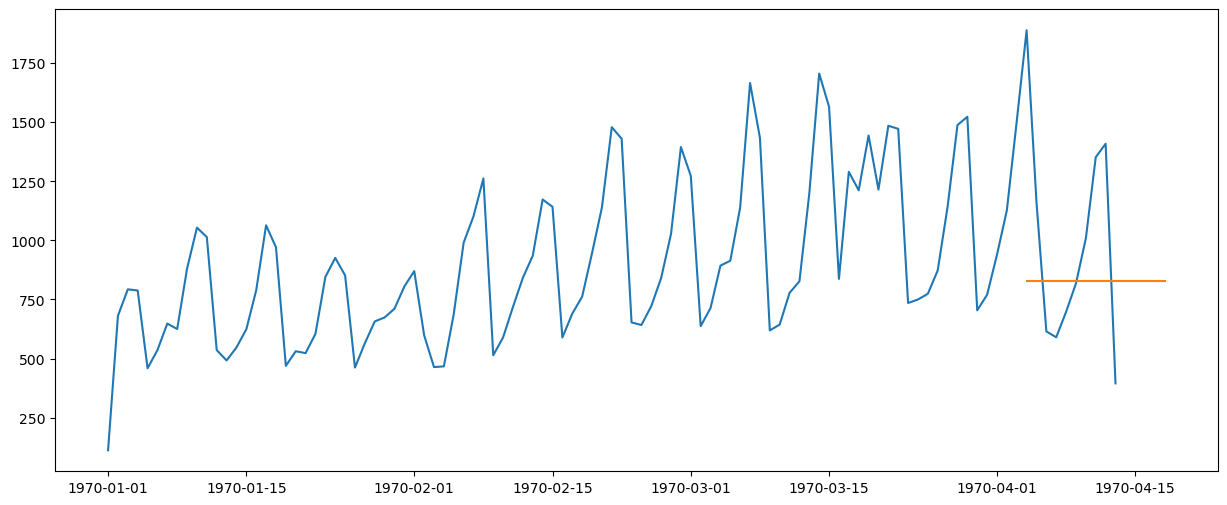

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
ax.plot(by_day)
ax.plot(prediction.forecast)

Part 2

Part 3